In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import xarray as xr
import pygrib
import cartopy as cp

In [2]:
import glob
files = glob.glob("MRMS_data_2019_05_16/MRMS_Merged*-20*.grib2")
files.sort()

file_list = []
for file in files:
     file_list.append(xr.open_dataset(file))
ds = xr.concat(file_list, dim="valid_time")
ds

Ignoring index file 'MRMS_data_2019_05_16\\MRMS_MergedReflectivityQCComposite_00.50_20190516-200038.grib2.923a8.idx' incompatible with GRIB file


<xarray.Dataset>
Dimensions:         (latitude: 3500, longitude: 7000, valid_time: 30)
Coordinates:
    time            (valid_time) datetime64[ns] 2019-05-16T20:00:00 ... 2019-...
    step            timedelta64[ns] 00:00:00
    heightAboveSea  float64 500.0
  * latitude        (latitude) float64 54.99 54.98 54.98 ... 20.03 20.02 20.01
  * longitude       (longitude) float64 230.0 230.0 230.0 ... 300.0 300.0 300.0
  * valid_time      (valid_time) datetime64[ns] 2019-05-16T20:00:00 ... 2019-...
Data variables:
    unknown         (valid_time, latitude, longitude) float32 -999.0 ... -999.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             161
    GRIB_centreDescription:  161
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             161
    history:                 2021-06-20T16:08 GRIB to CDM+CF via cfgrib-0.9.9...

In [3]:
extent_data = [230,300,55,20]
extent_us_zoom = [230,300,49,20]
extent_midwest_zoom = [265,280,45,35]
states_provinces = cp.feature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='50m',facecolor='none')

In [4]:
refc = ds.unknown
refc.values = (refc.values > 0)*refc.values

In [5]:
minutes_list = [10,30,60]
size_list = [6,2,1]
#agg_types = ['Maximum','rawAvg','boolMax','boolAvg','presentAvg']
zoom_types = ['CONUS','midwest']
zoom_extents = [extent_us_zoom,extent_midwest_zoom]
timestring_10 = ['2000 UTC - 2010 UTC', '2010 UTC - 2020 UTC', '2020 UTC - 2030 UTC', '2030 UTC - 2040 UTC', '2040 UTC - 2050 UTC', '2050 UTC - 2100 UTC']
timestring_30 = ['2000 UTC - 2030 UTC', '2030 UTC - 2100 UTC']
timestring_60 = ['2000 UTC - 2100 UTC']
timestring = [timestring_10,timestring_30,timestring_60]

In [6]:
cbar_max = print(refc.values.max())

70.5


### Maximum Reflectivity

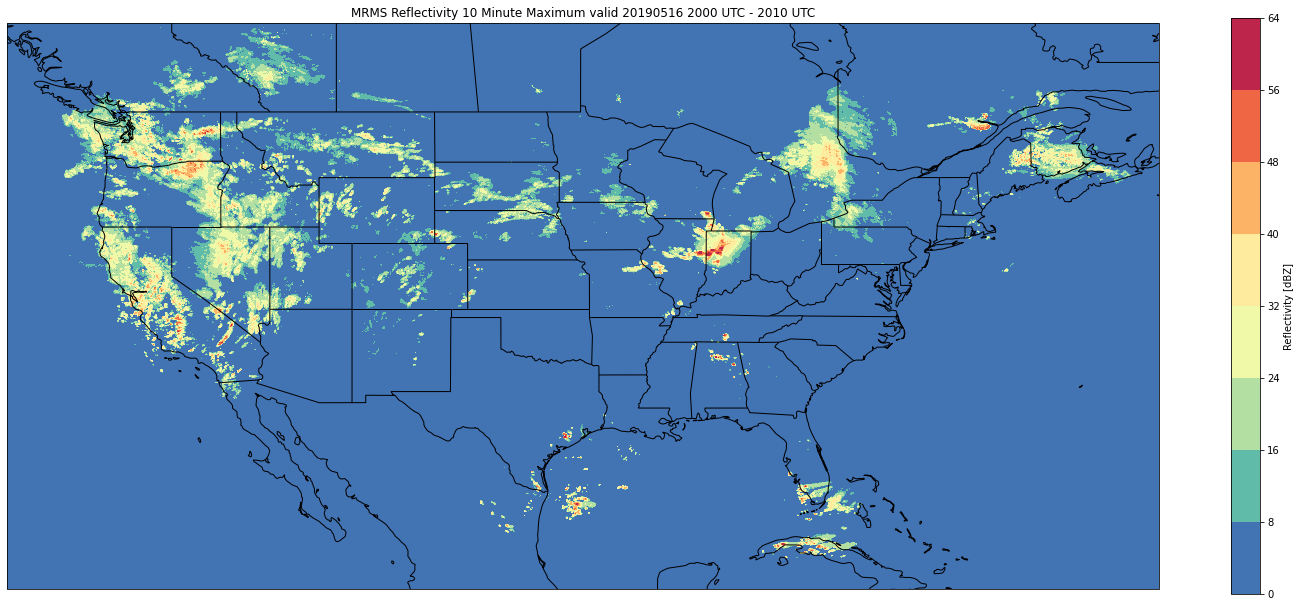

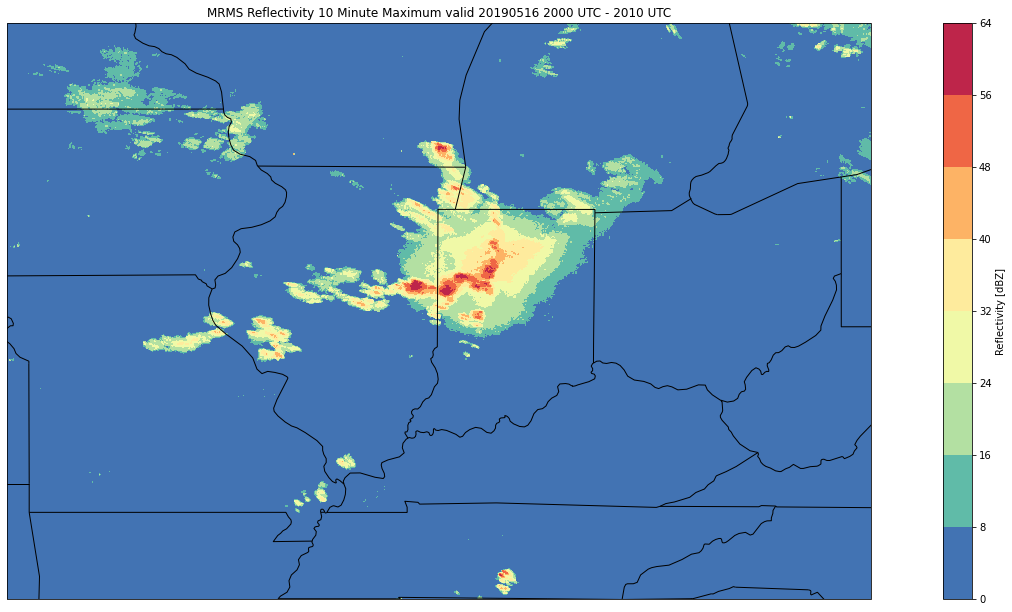

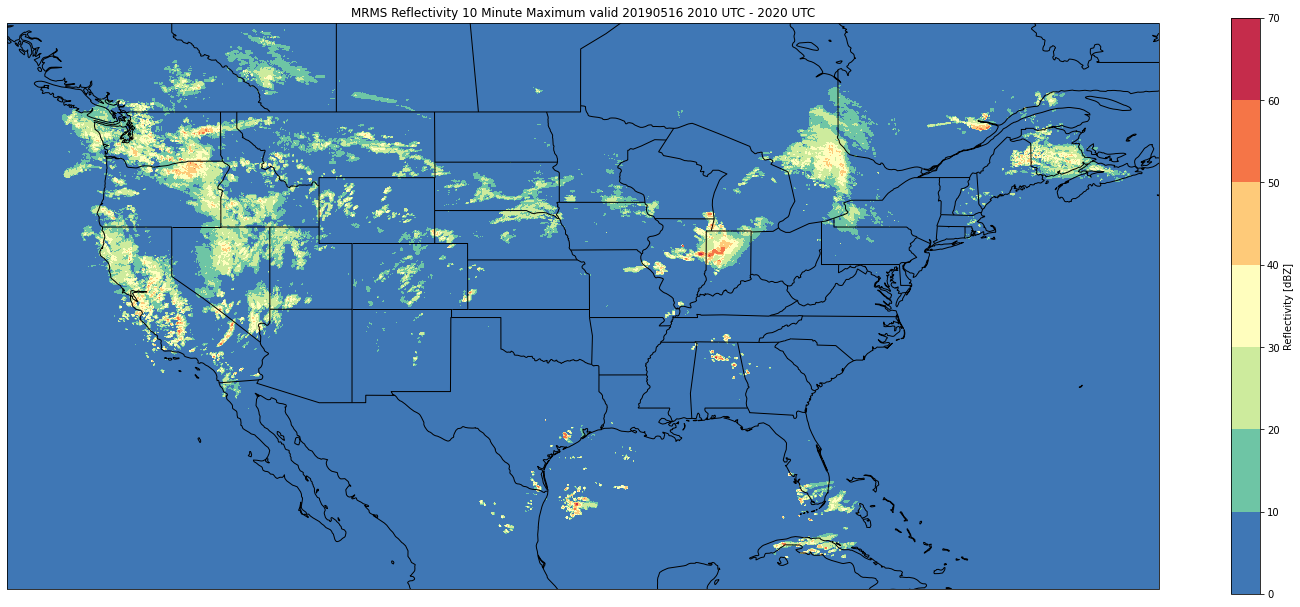

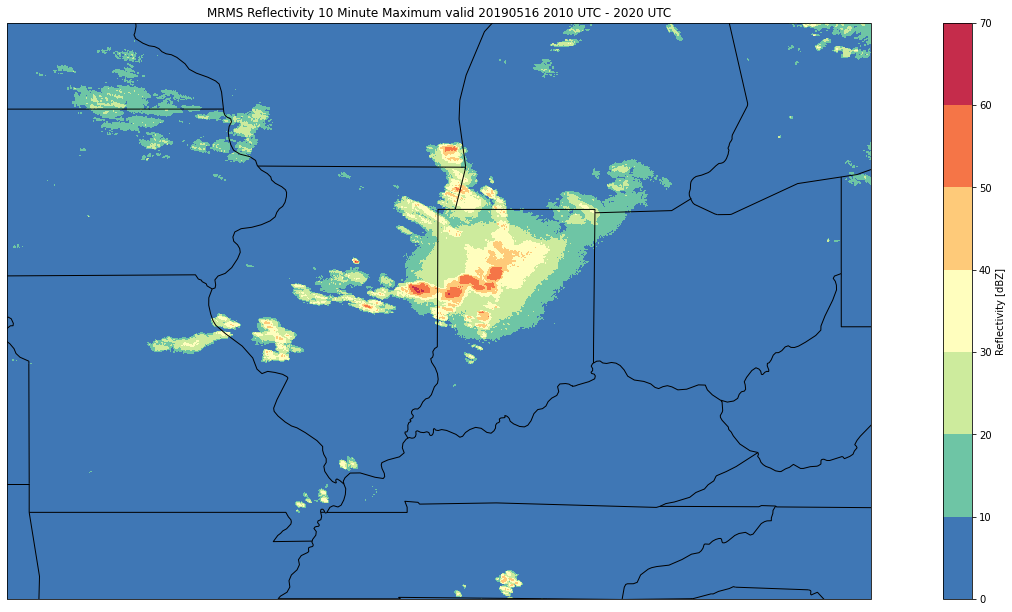

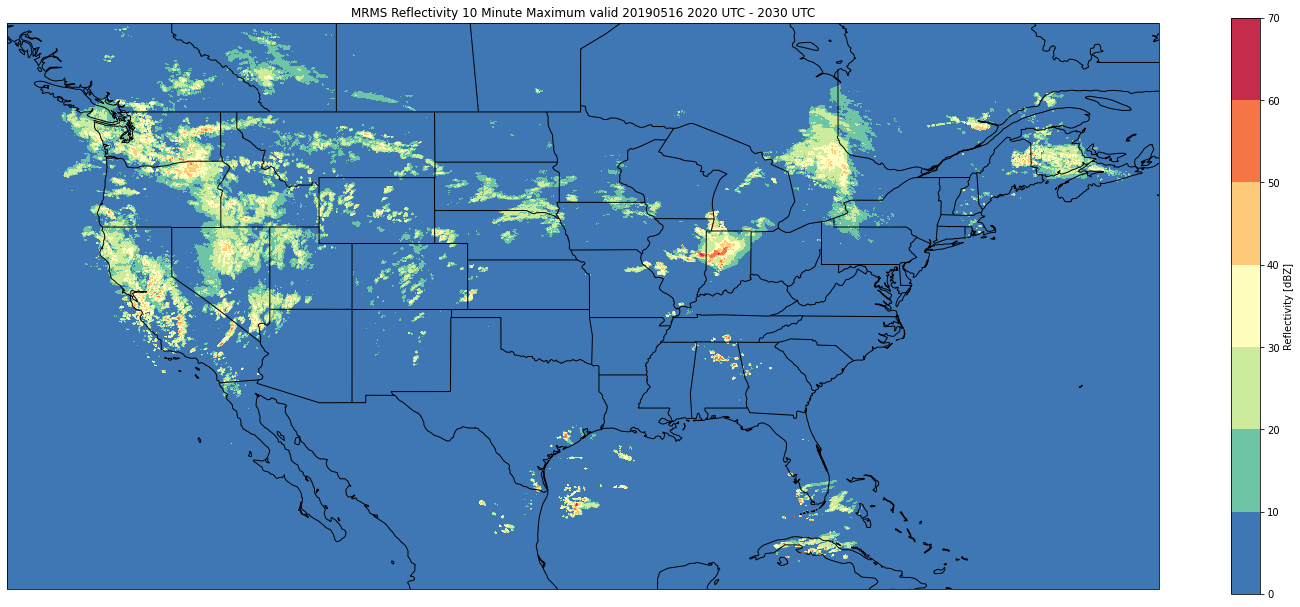

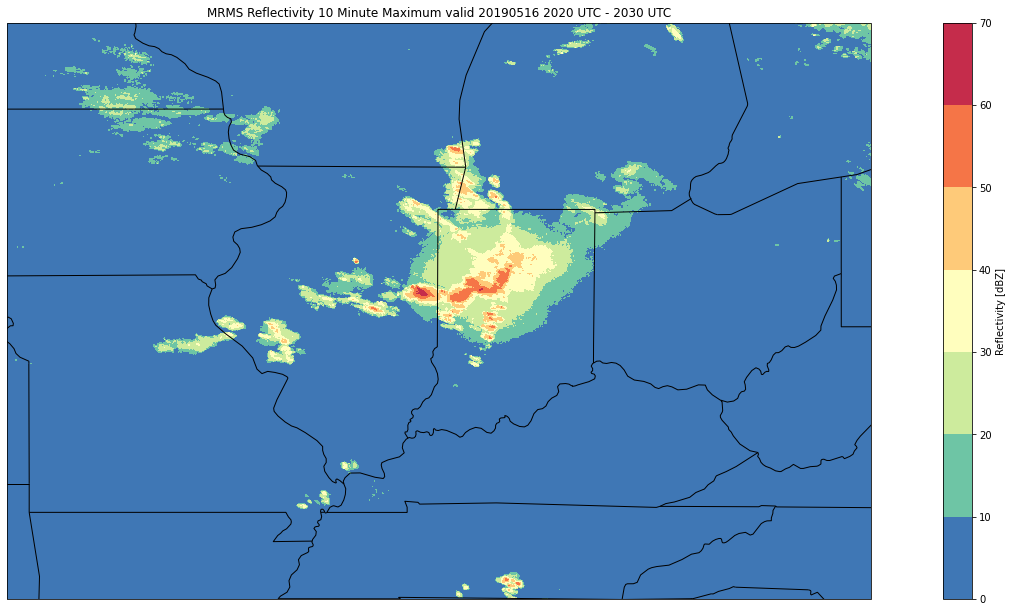

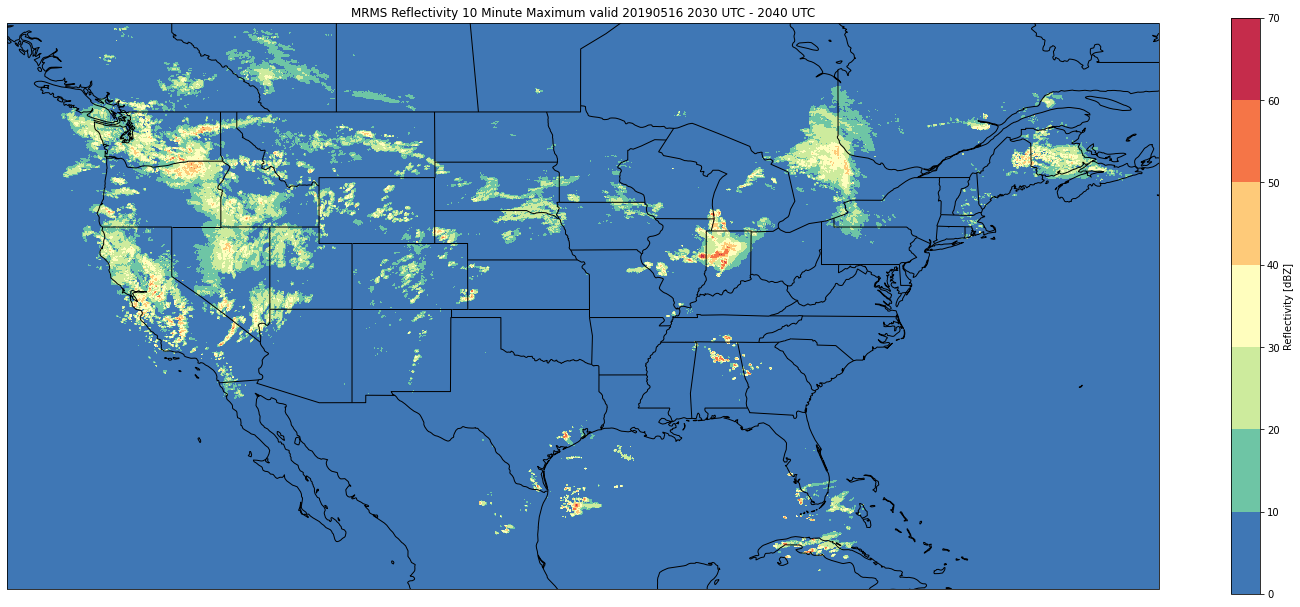

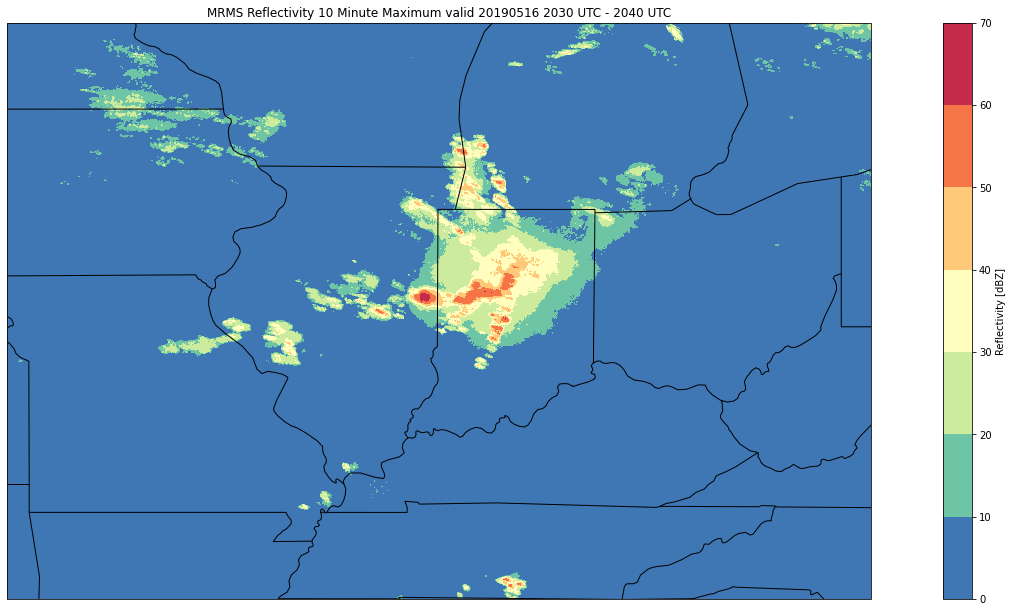

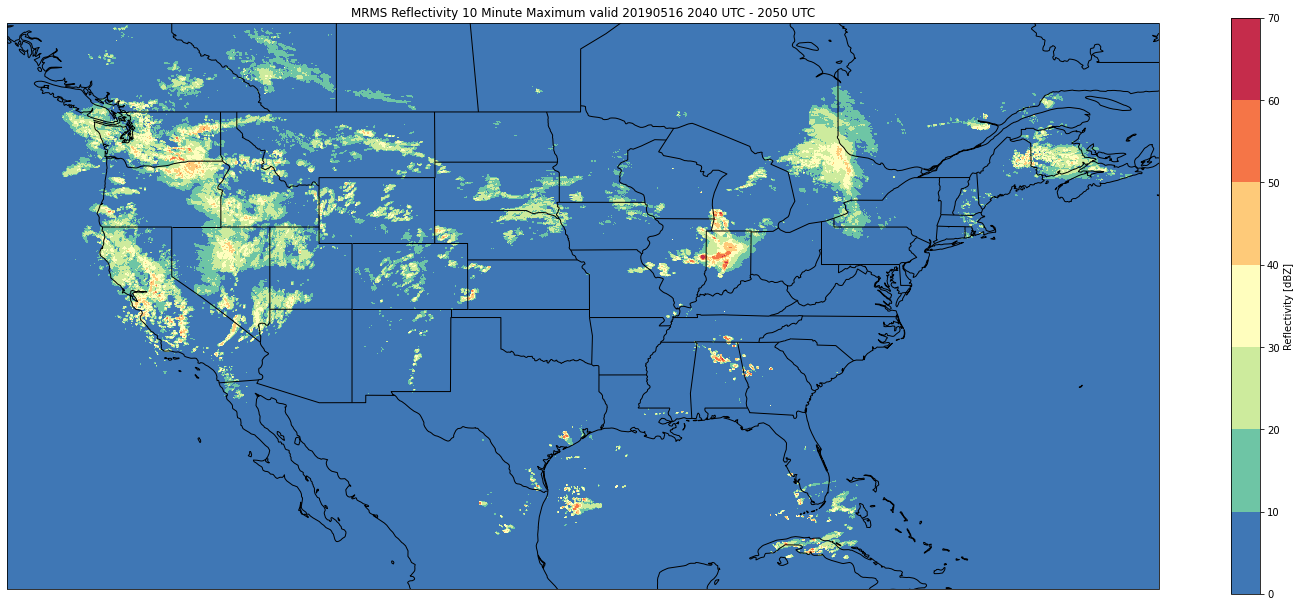

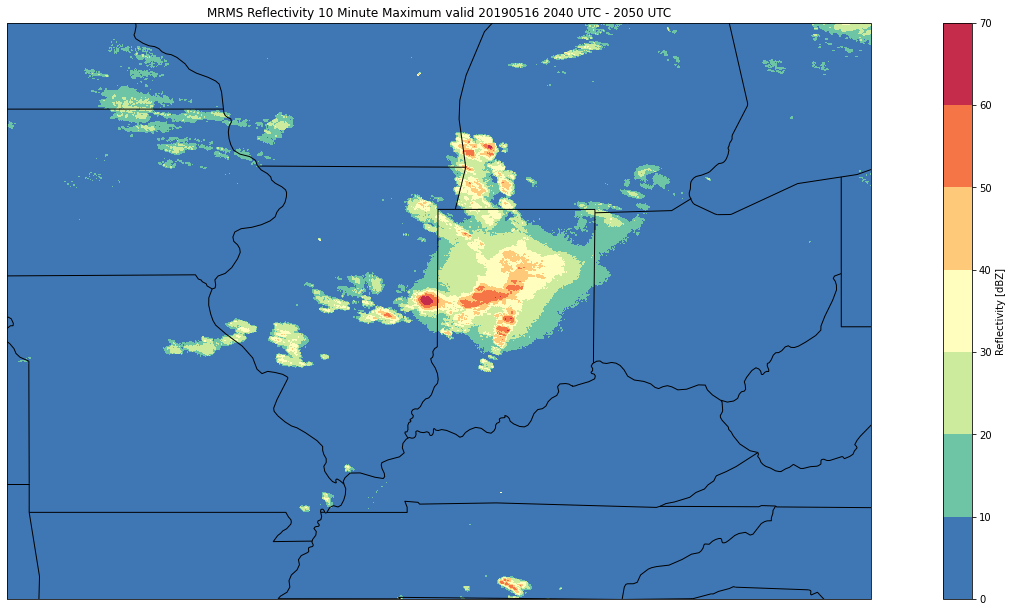

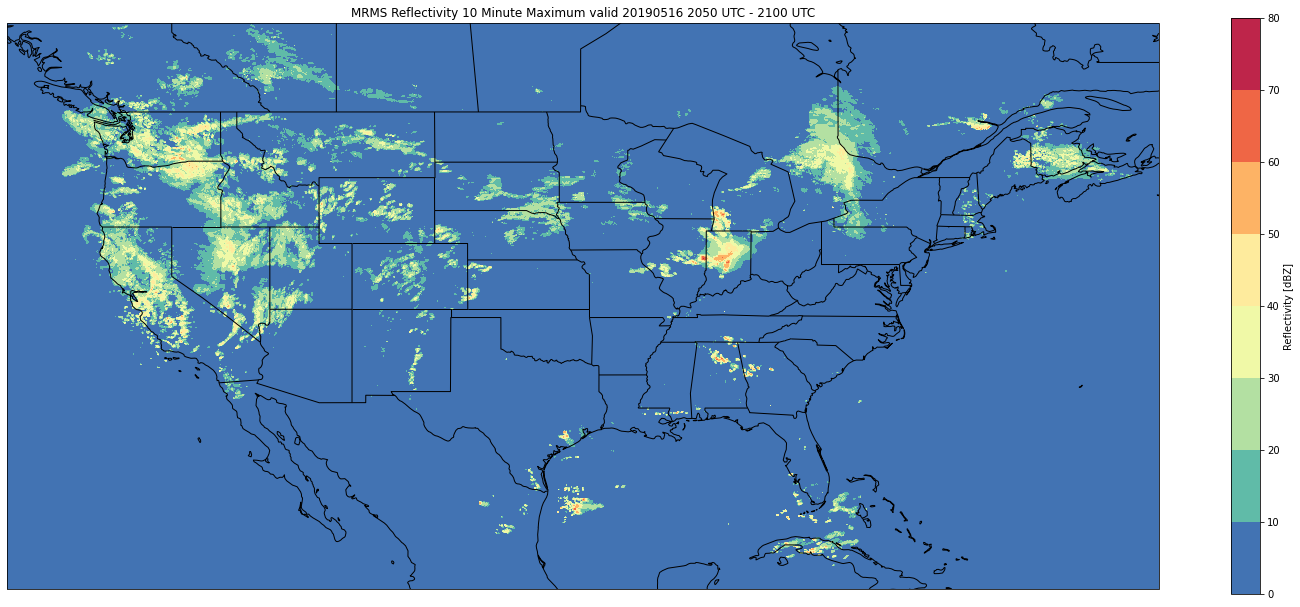

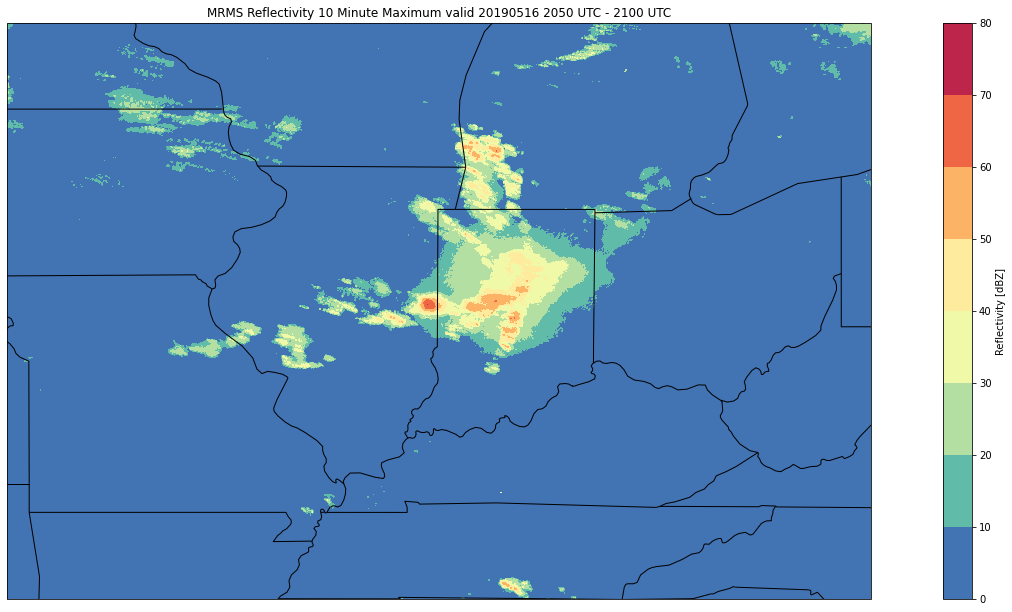

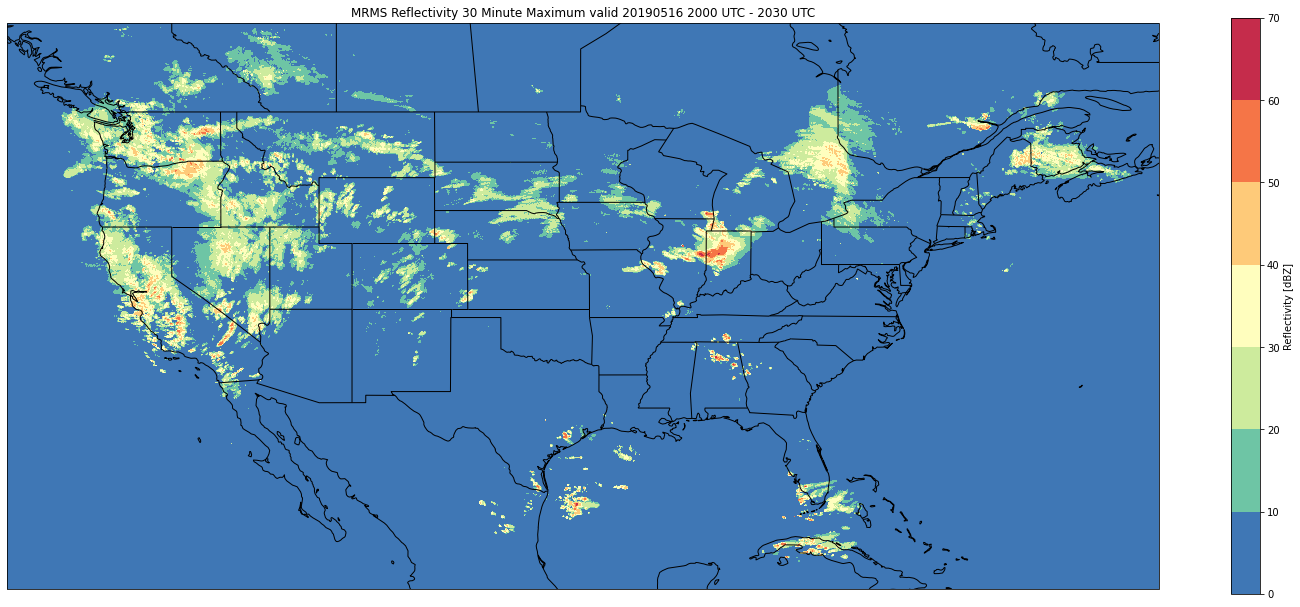

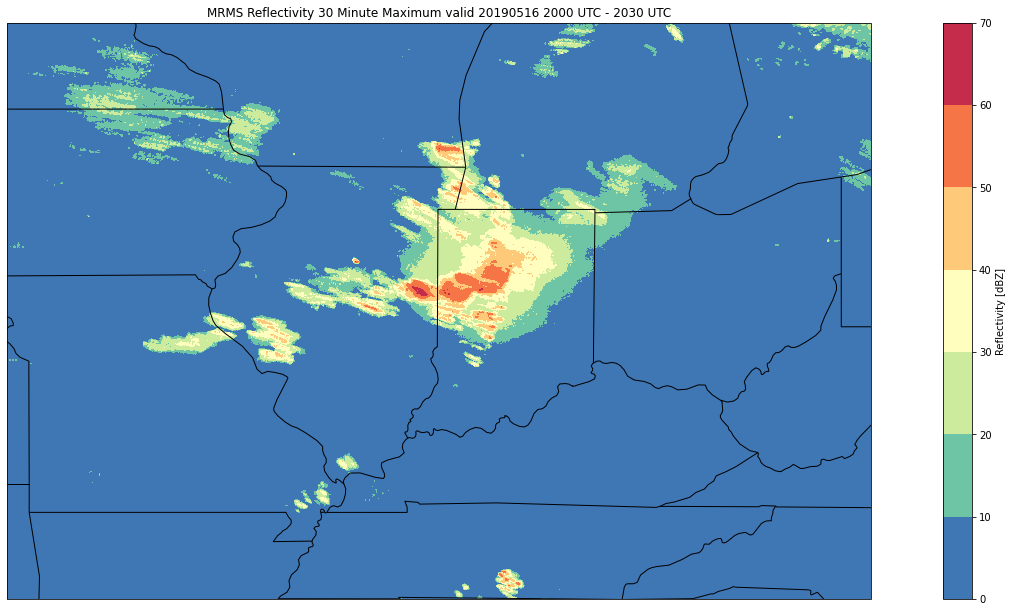

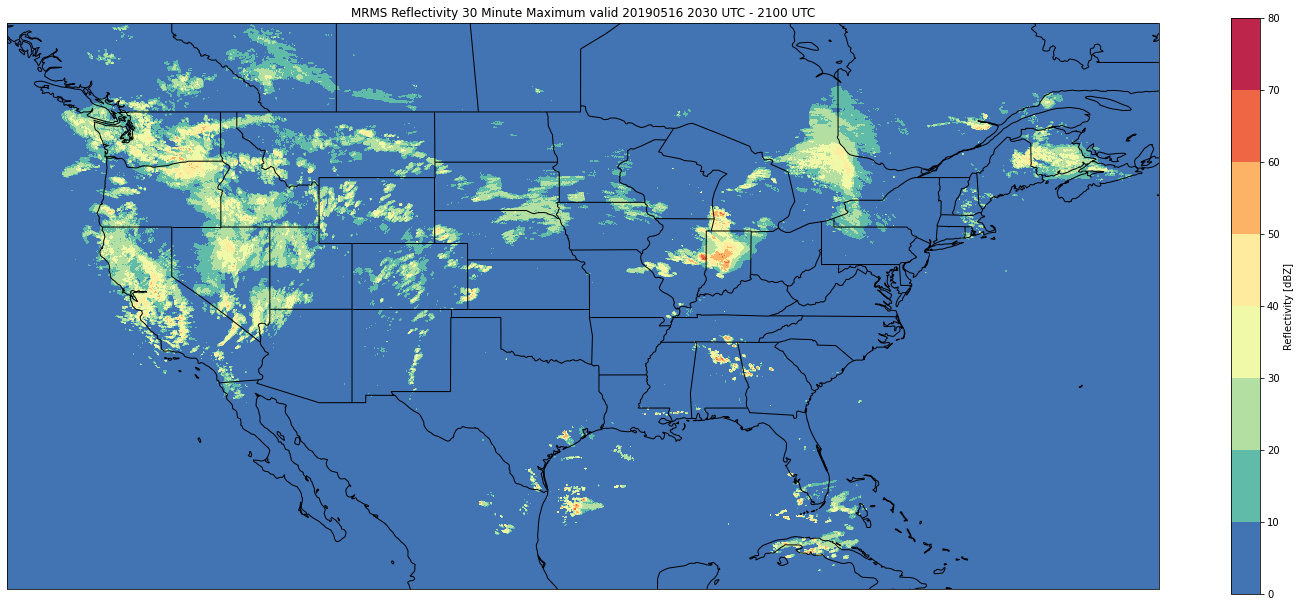

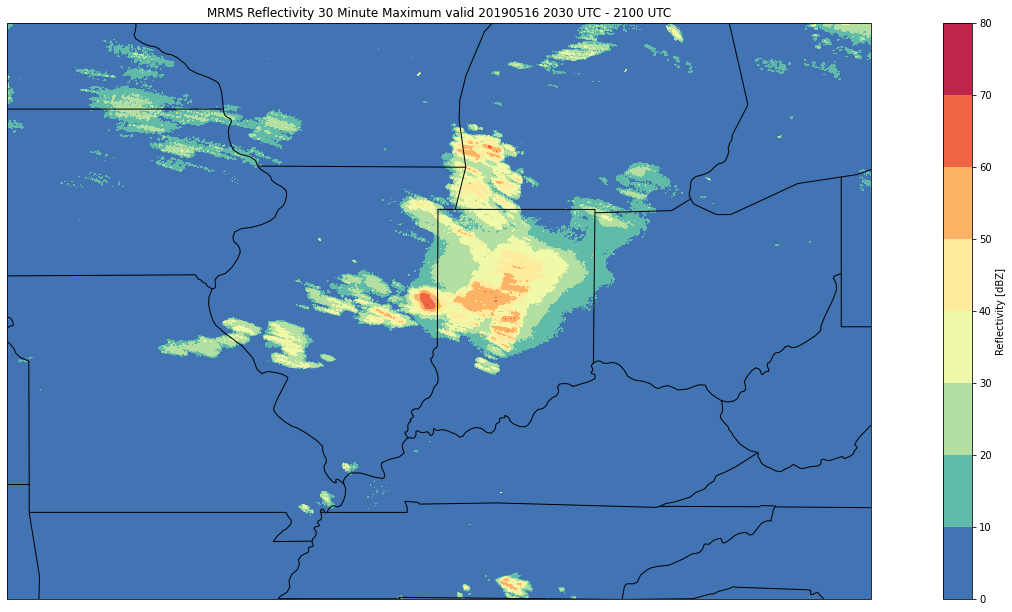

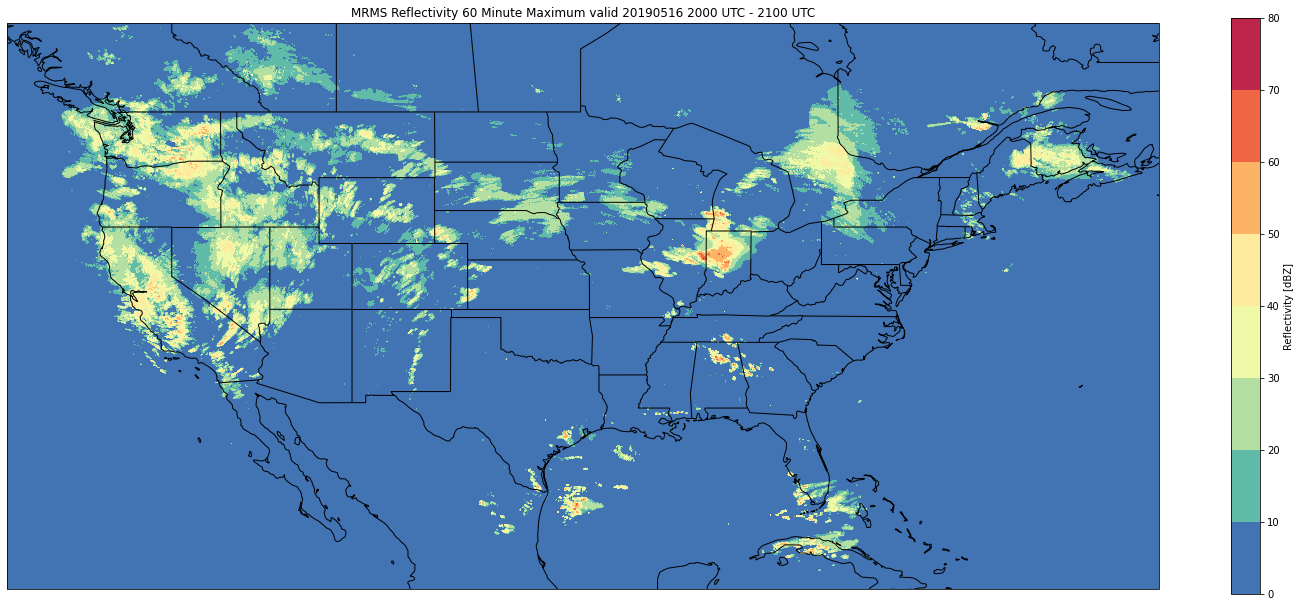

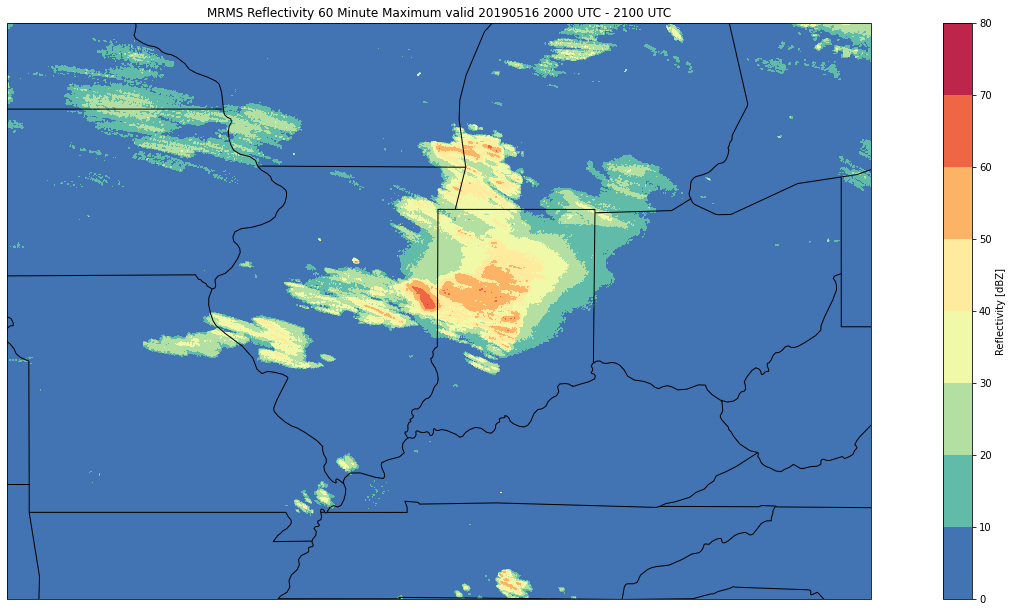

In [9]:
for i in range(len(size_list)):
    mins = minutes_list[i]
    size = size_list[i]
    
    #maximum
    refc_max = refc.coarsen(valid_time=int(mins/2),coord_func='max').max()
    for time in range(size):
        for z in range(len(zoom_types)):
            zoom = zoom_types[z]
            zoom_extent = zoom_extents[z]
            
            fig = plt.figure()
            fig.set_size_inches(20,8)
            ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
            ax.add_feature(cp.feature.BORDERS)
            ax.add_feature(cp.feature.COASTLINE)
            ax.add_feature(states_provinces)
            ax.set_extent(zoom_extent)
            
            plot = ax.contourf(refc_max.longitude,
                               refc_max.latitude,
                               refc_max.isel(valid_time=time).values,
                               cmap="Spectral_r",
                               vmin = 0,
                               vmax=cbar_max,
                               transform=ccrs.PlateCarree())
            
            colbar = plt.colorbar(plot,orientation='vertical')
            colbar.set_label('Reflectivity [dBZ]',rotation='vertical',fontsize='medium')
            
            titlestr = 'MRMS Reflectivity ' + str(mins) + ' Minute Maximum valid 20190516 ' + timestring[i][time]
            ax.set_title(titlestr, fontsize='large')
            
            plt.savefig("2019_05_16_figures/Reflectivity_Maximum_" + zoom + '_' + str(mins) + '.' + str(time) + '_Minute_test.png',bbox_inches='tight')

### Average Reflectivity

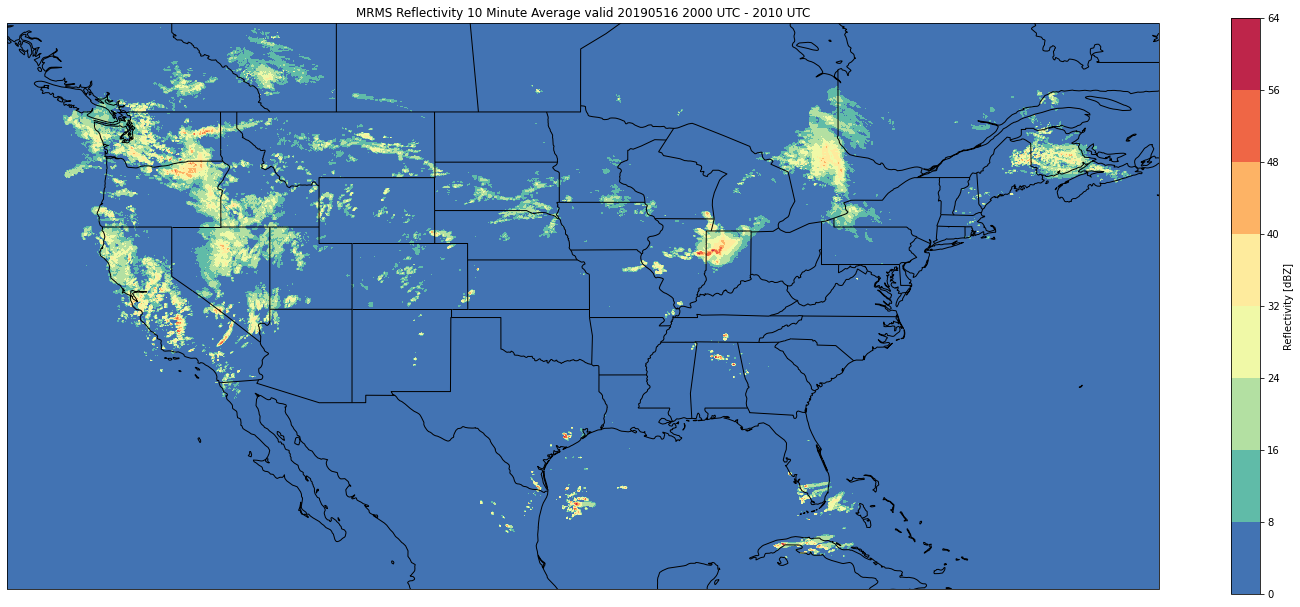

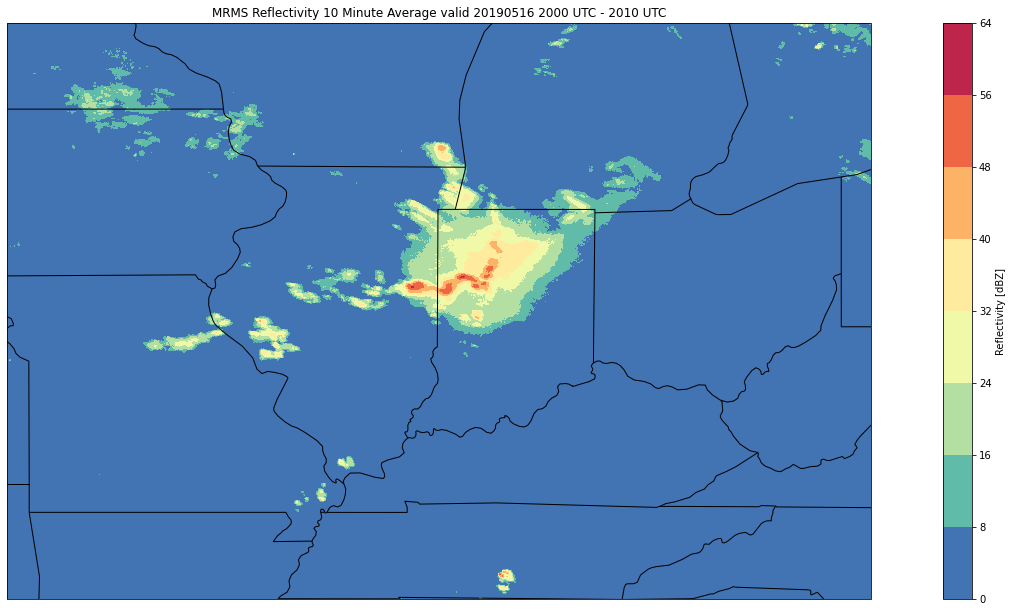

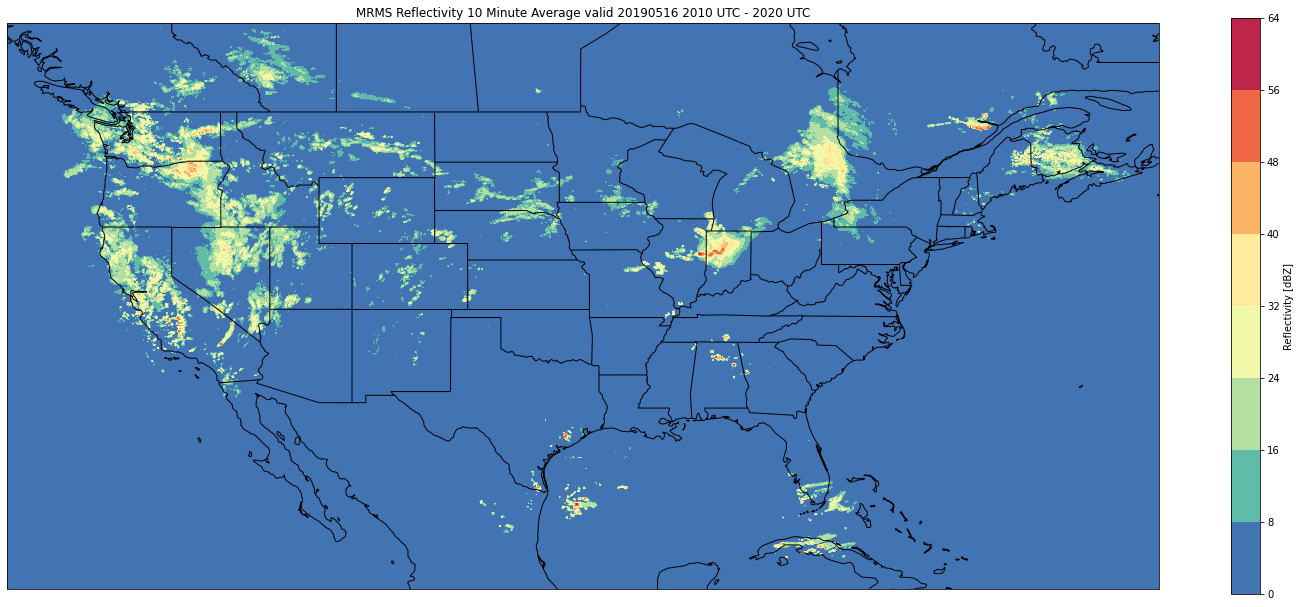

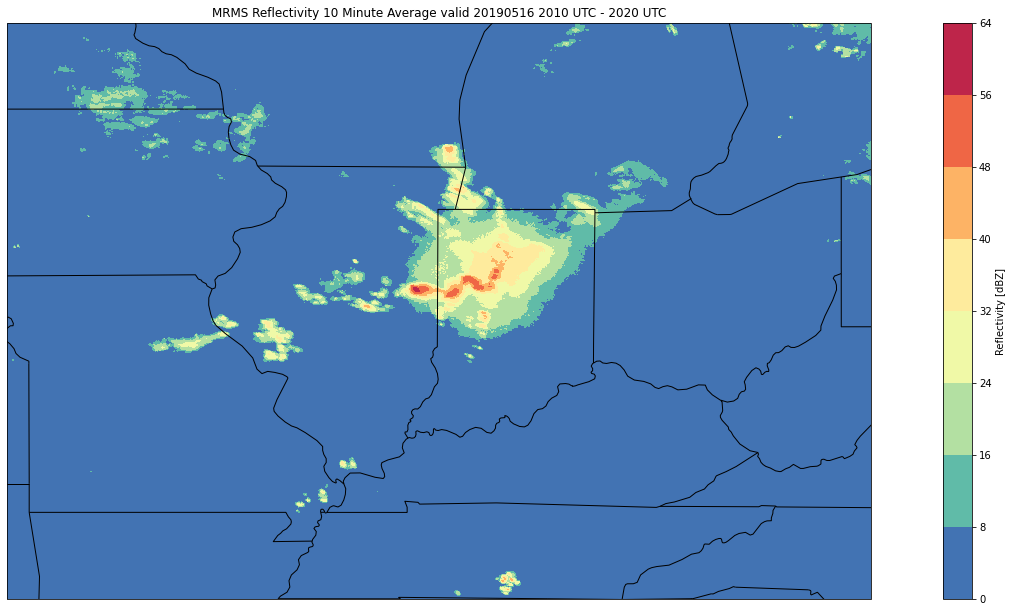

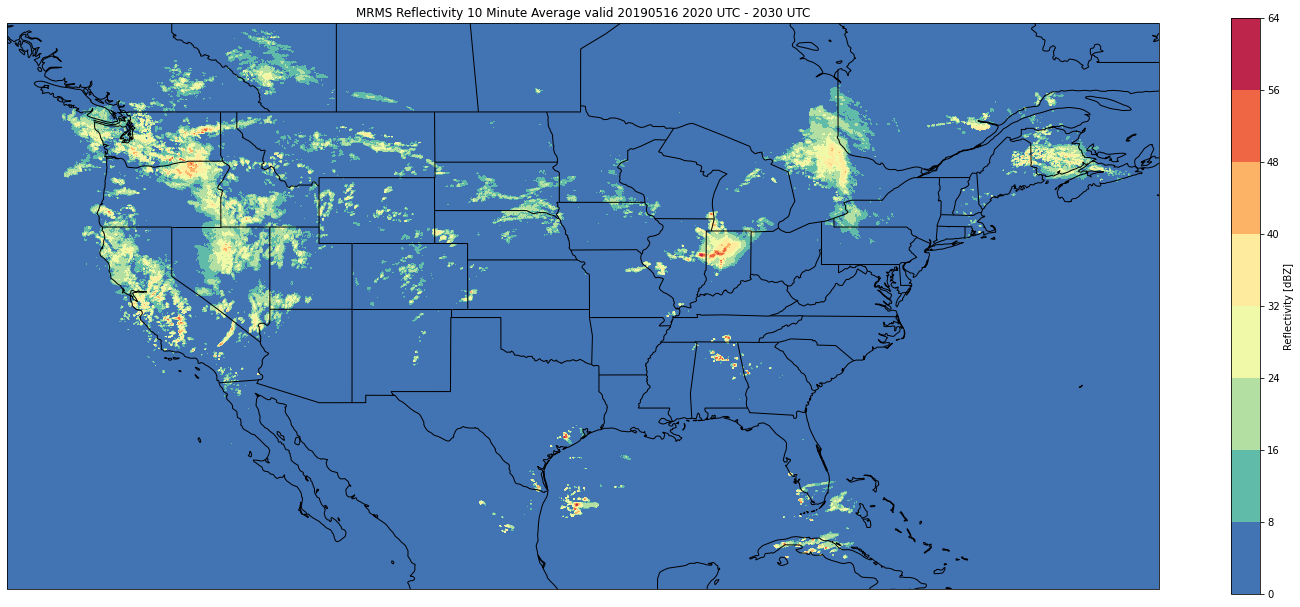

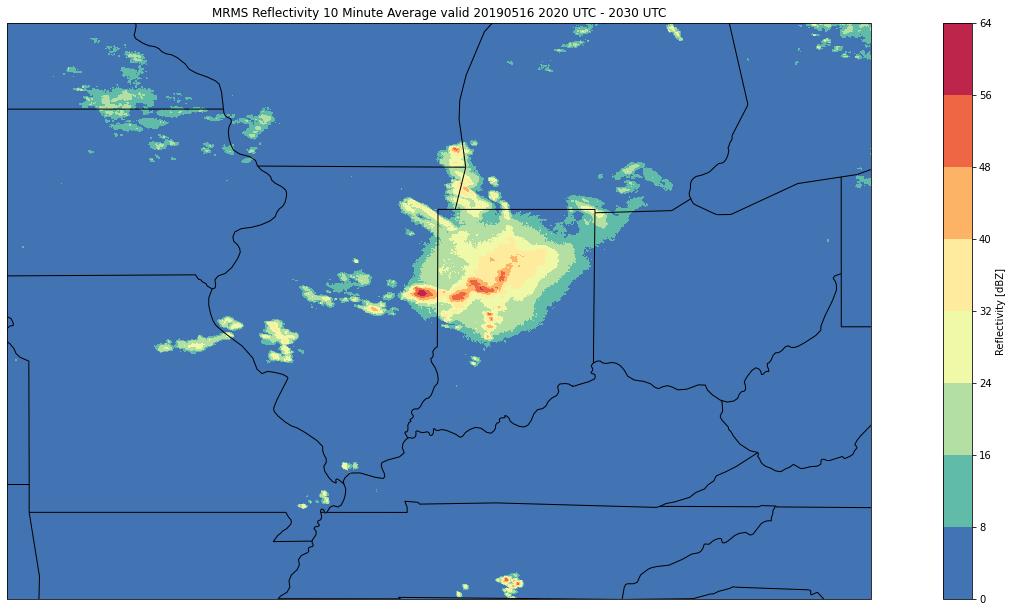

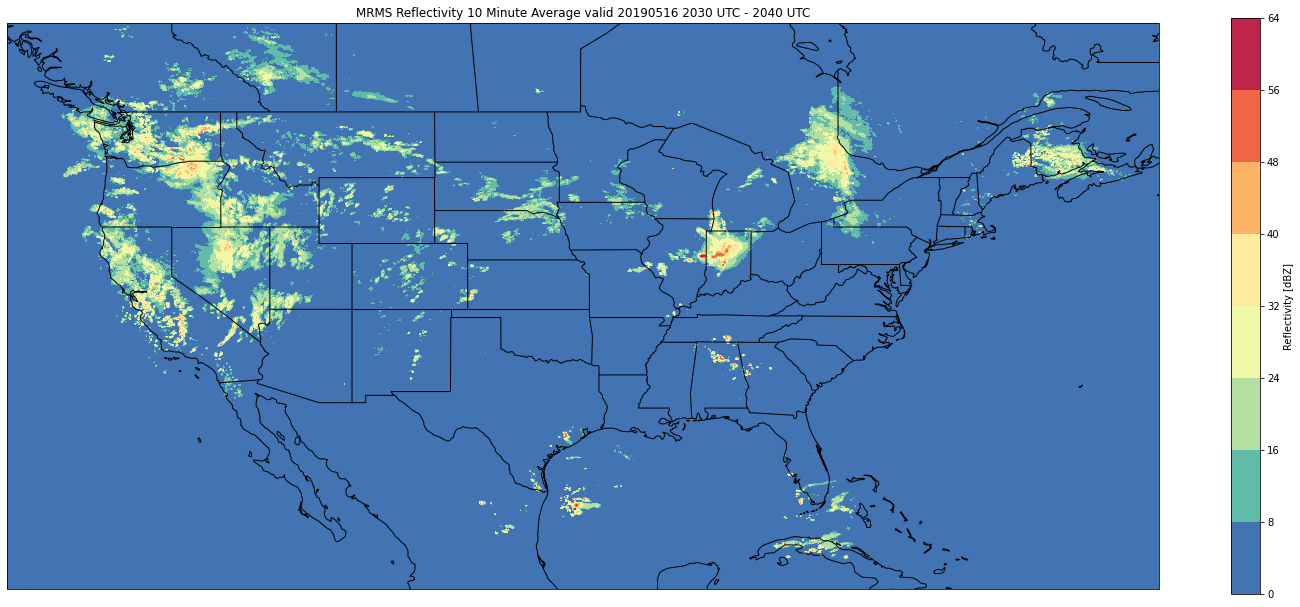

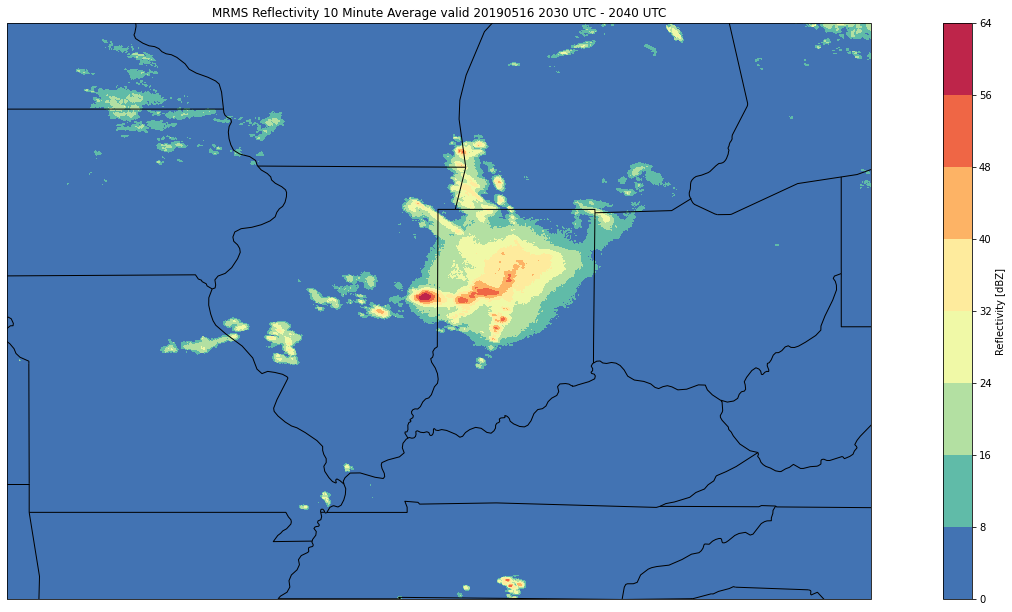

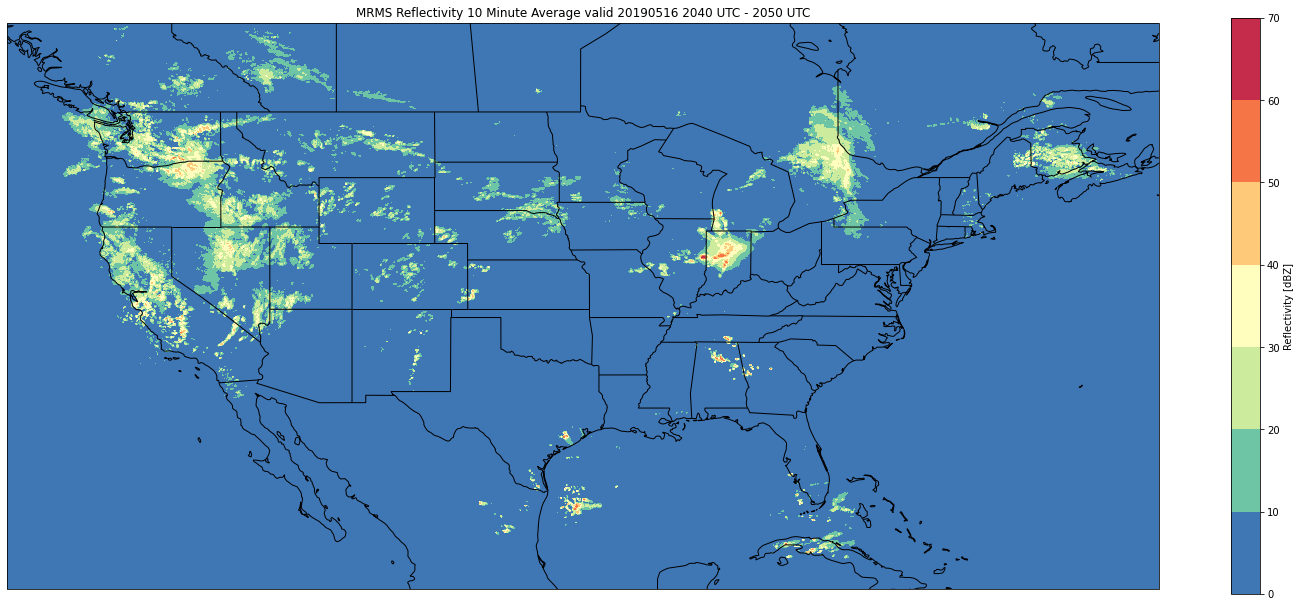

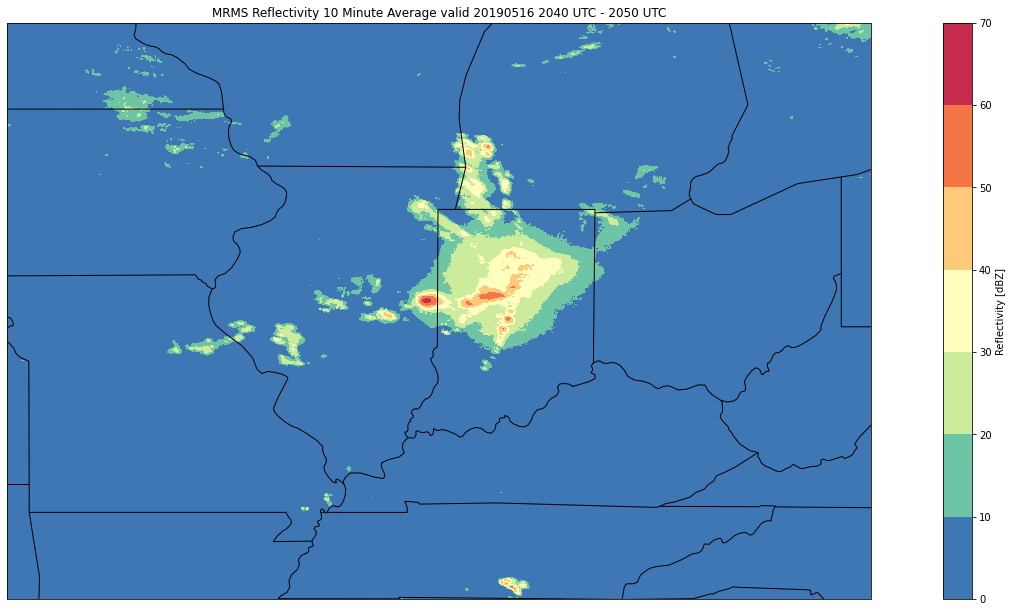

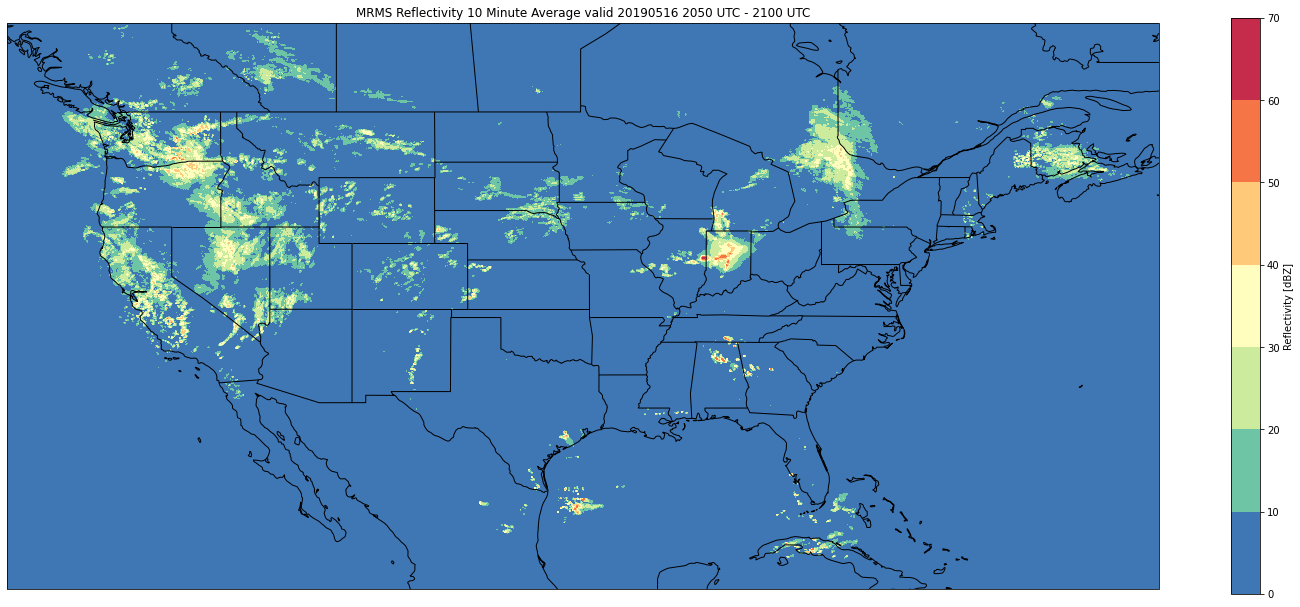

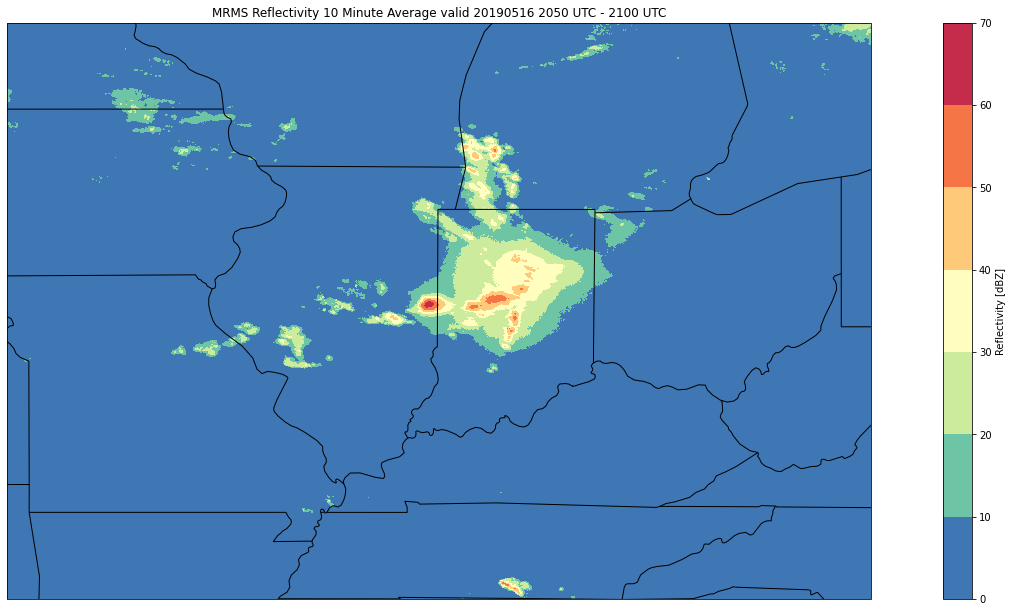

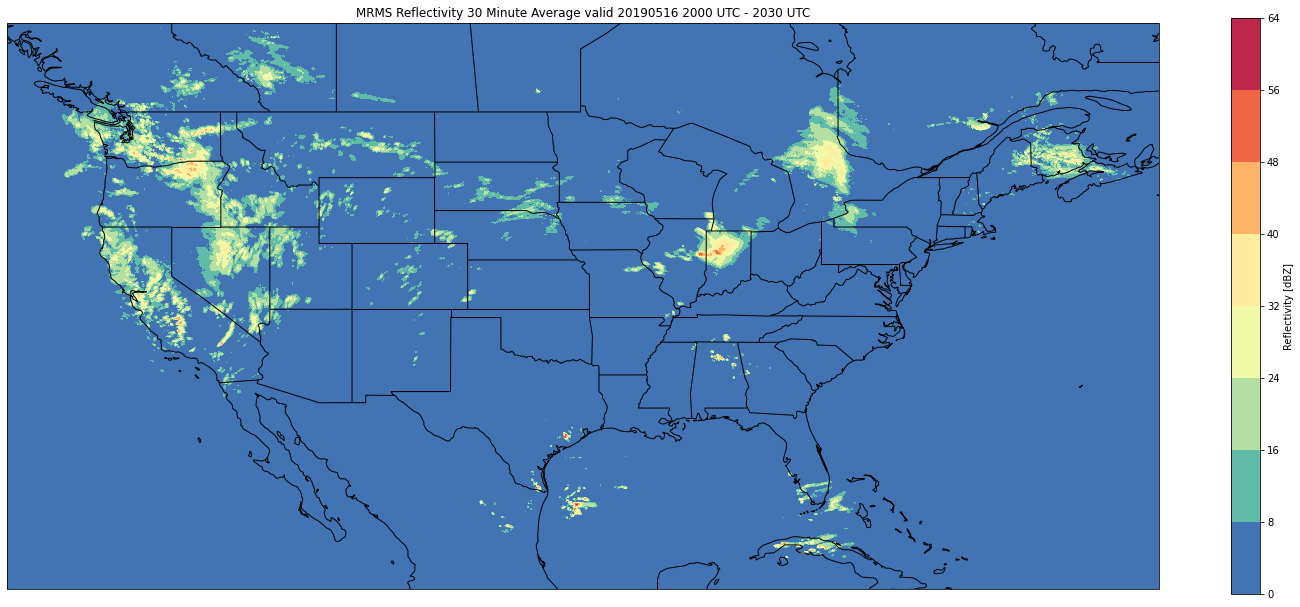

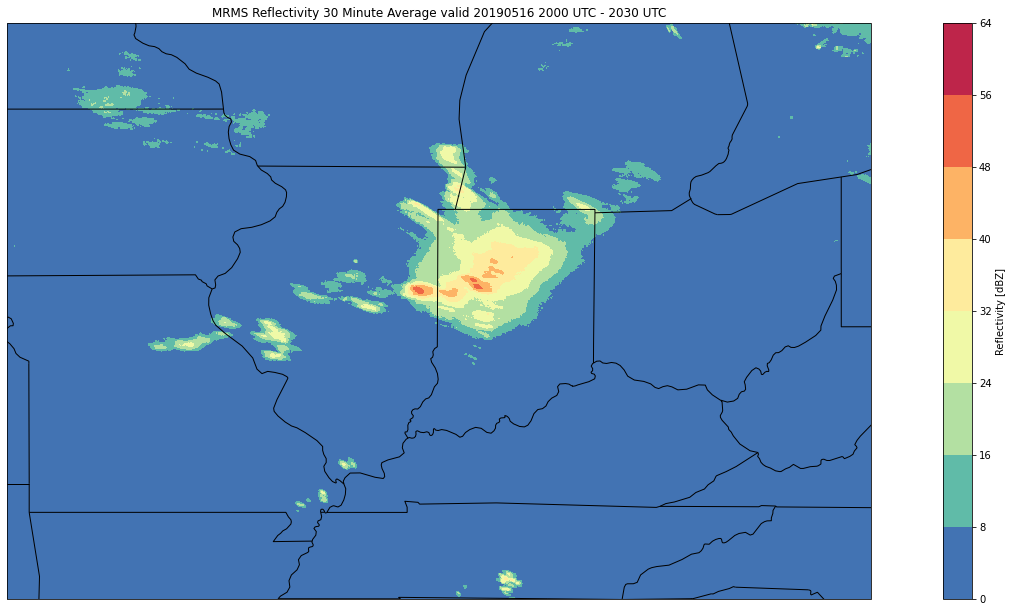

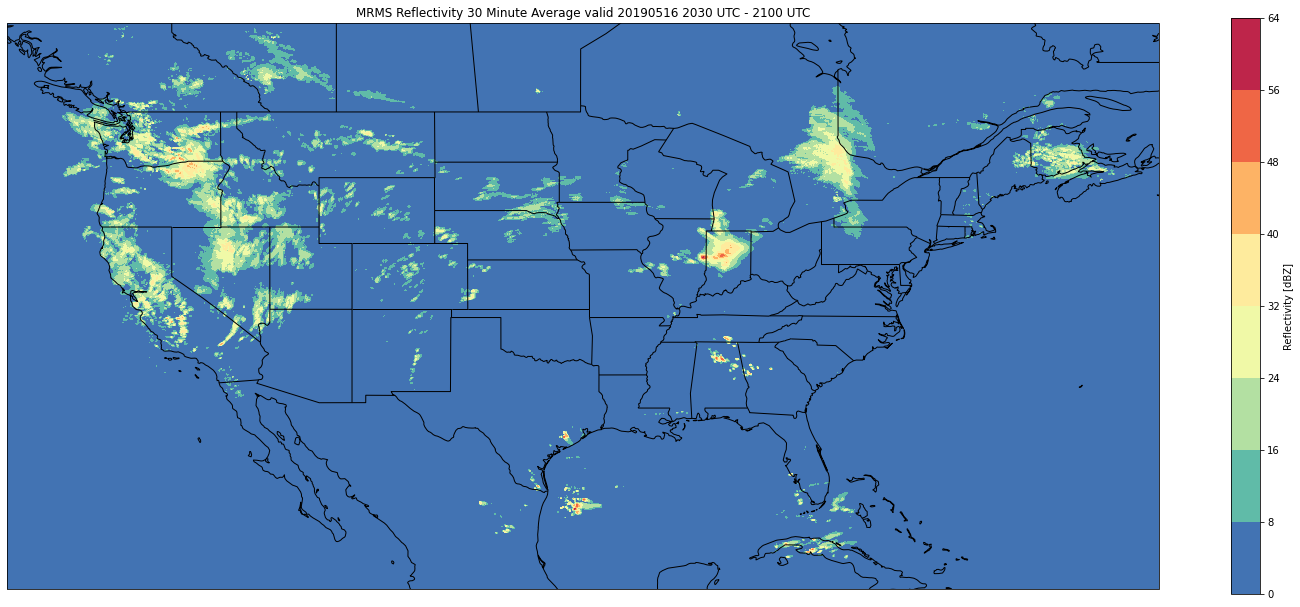

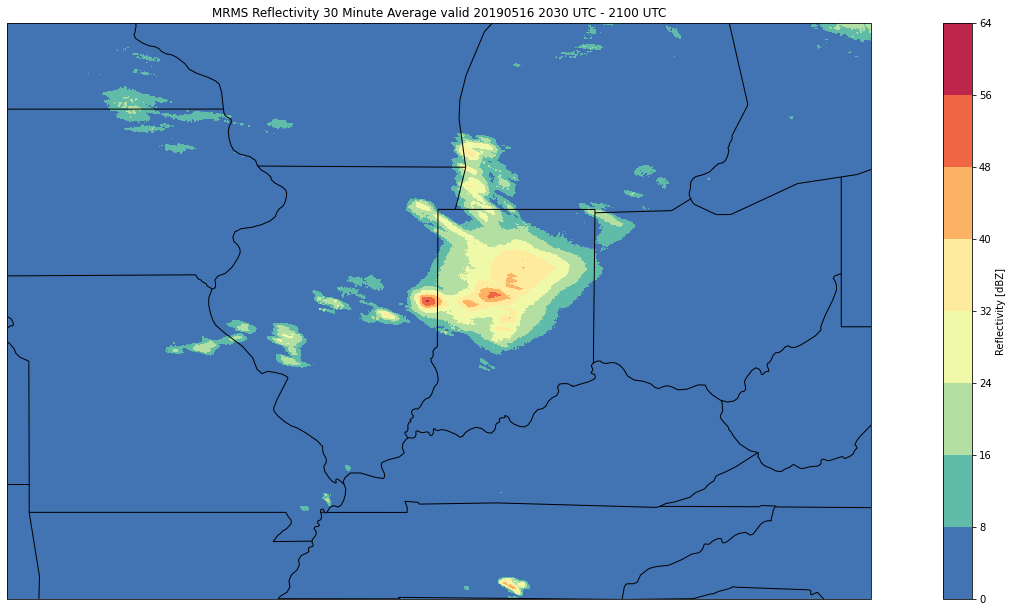

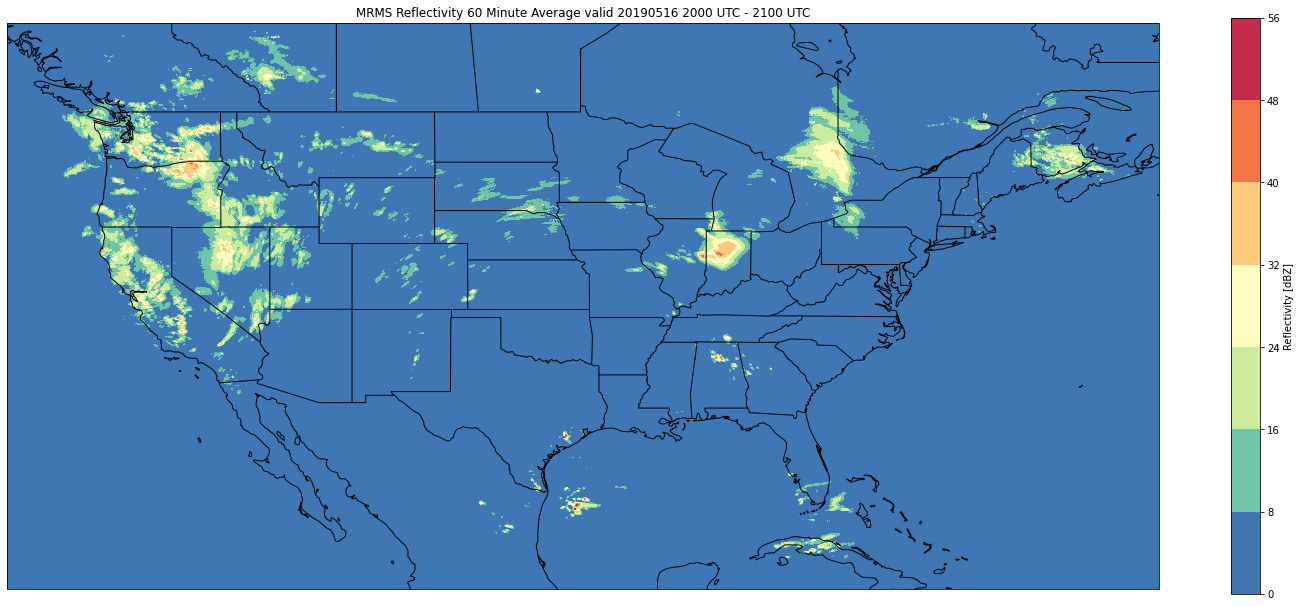

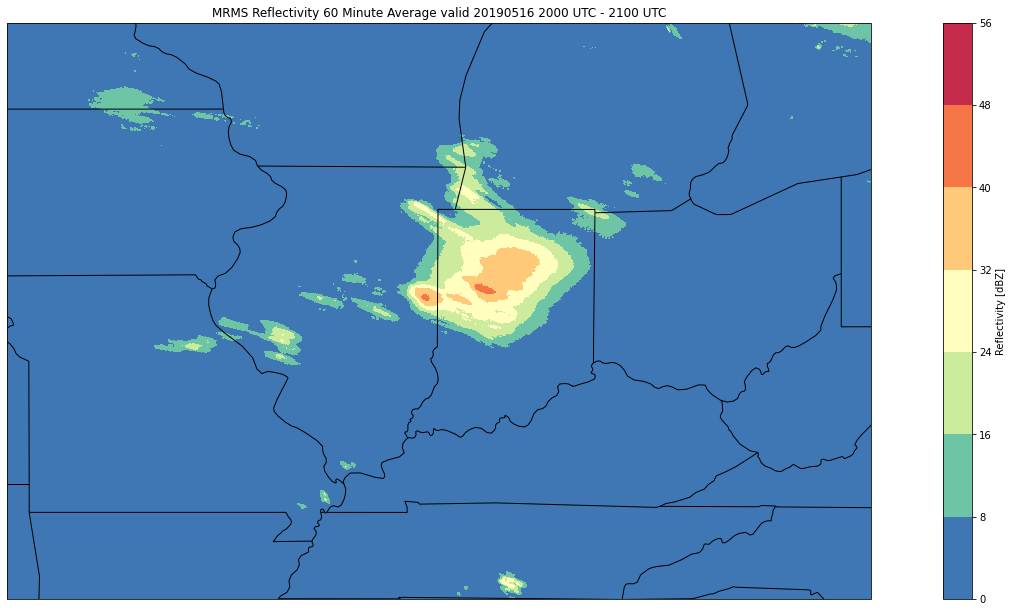

In [10]:
for i in range(len(size_list)):
    mins = minutes_list[i]
    size = size_list[i]
    
    #maximum
    refc_avg = refc.coarsen(valid_time=int(mins/2),coord_func='mean').mean()
    for time in range(size):
        for z in range(len(zoom_types)):
            zoom = zoom_types[z]
            zoom_extent = zoom_extents[z]
            
            fig = plt.figure()
            fig.set_size_inches(20,8)
            ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
            ax.add_feature(cp.feature.BORDERS)
            ax.add_feature(cp.feature.COASTLINE)
            ax.add_feature(states_provinces)
            ax.set_extent(zoom_extent)
            
            plot = ax.contourf(refc_avg.longitude,
                               refc_avg.latitude,
                               refc_avg.isel(valid_time=time).values,
                               cmap="Spectral_r",
                               vmin = 0,
                               vmax=cbar_max,
                               transform=ccrs.PlateCarree())
            
            colbar = plt.colorbar(plot,orientation='vertical')
            colbar.set_label('Reflectivity [dBZ]',rotation='vertical',fontsize='medium')
            
            titlestr = 'MRMS Reflectivity ' + str(mins) + ' Minute Average valid 20190516 ' + timestring[i][time]
            ax.set_title(titlestr, fontsize='large')
            
            plt.savefig("2019_05_16_figures/Reflectivity_Average_" + zoom + '_' + str(mins) + '.' + str(time) + '_Minute_test.png',bbox_inches='tight')

### Bool Reflectivity

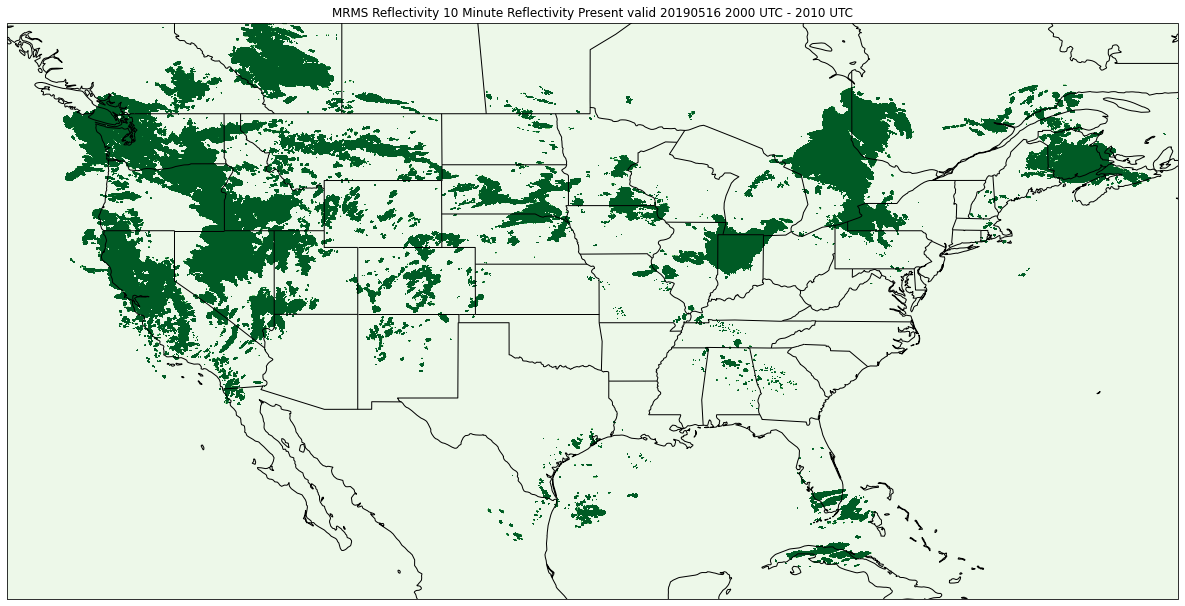

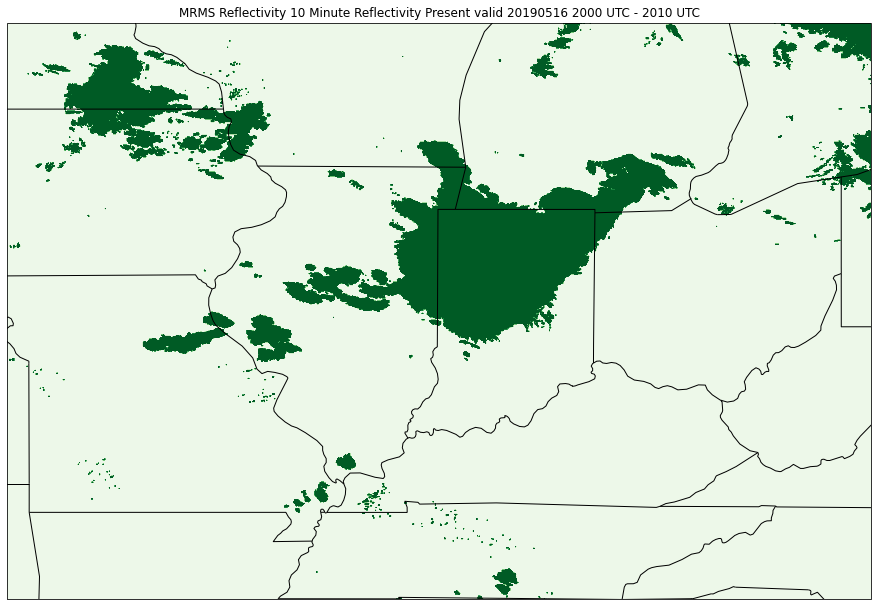

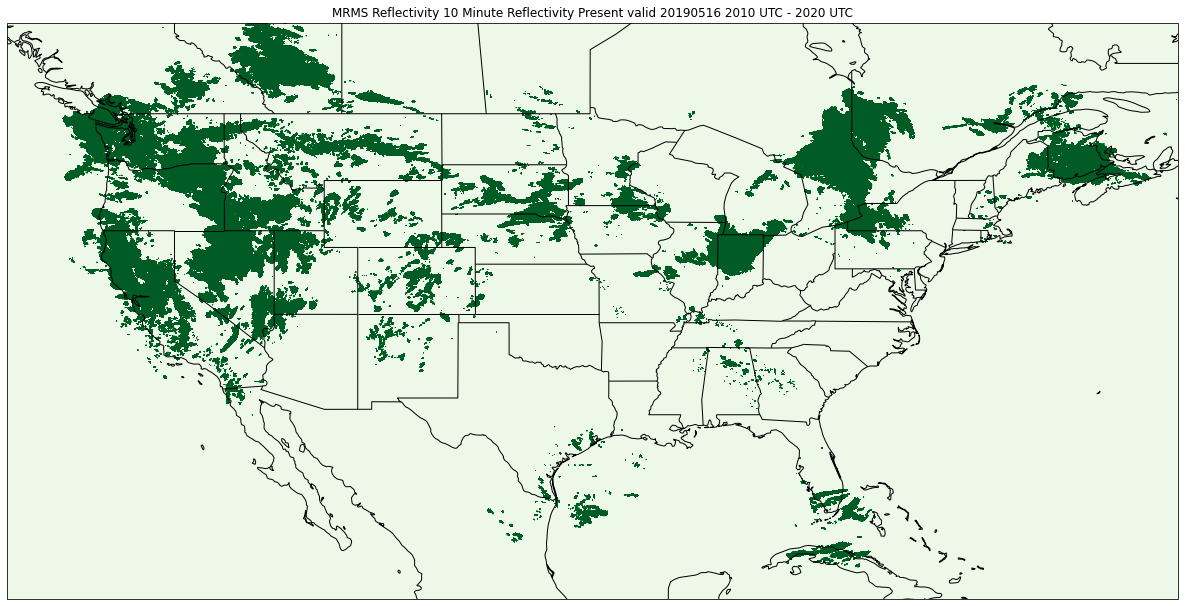

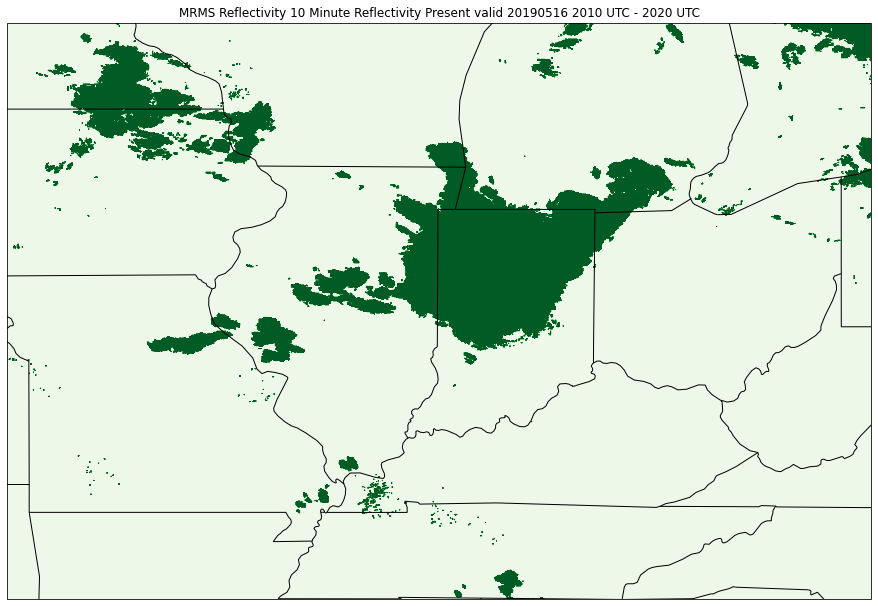

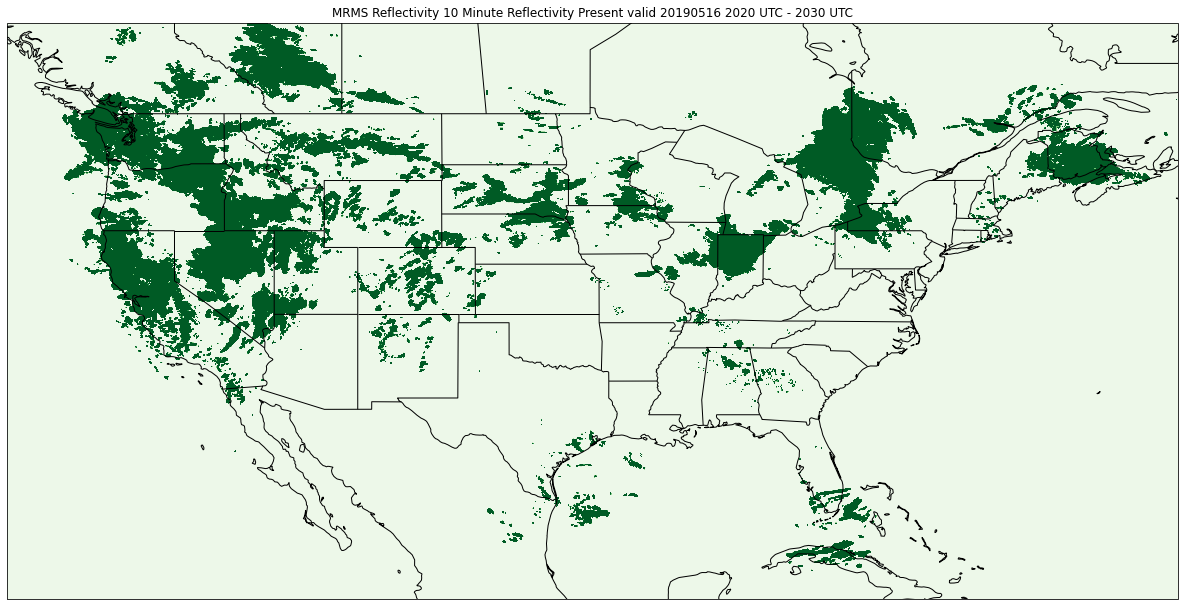

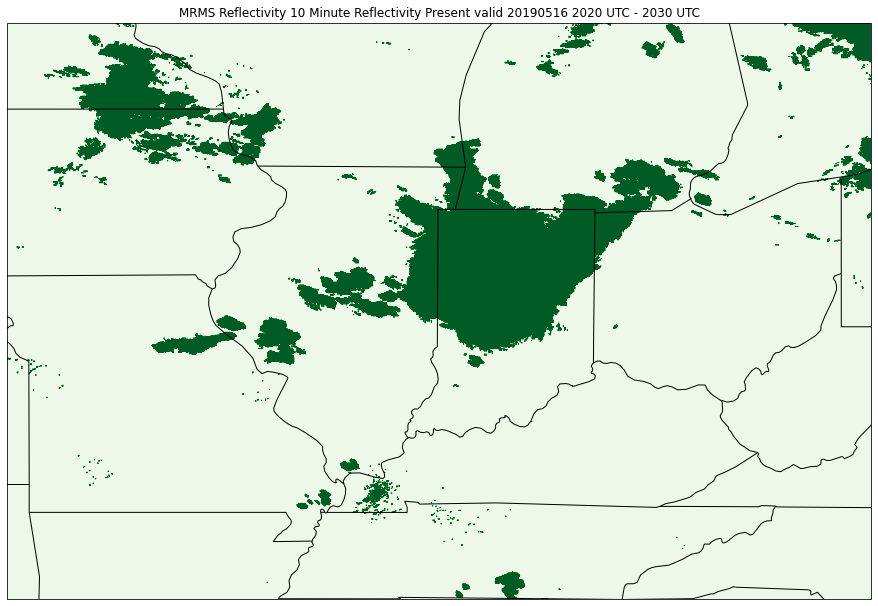

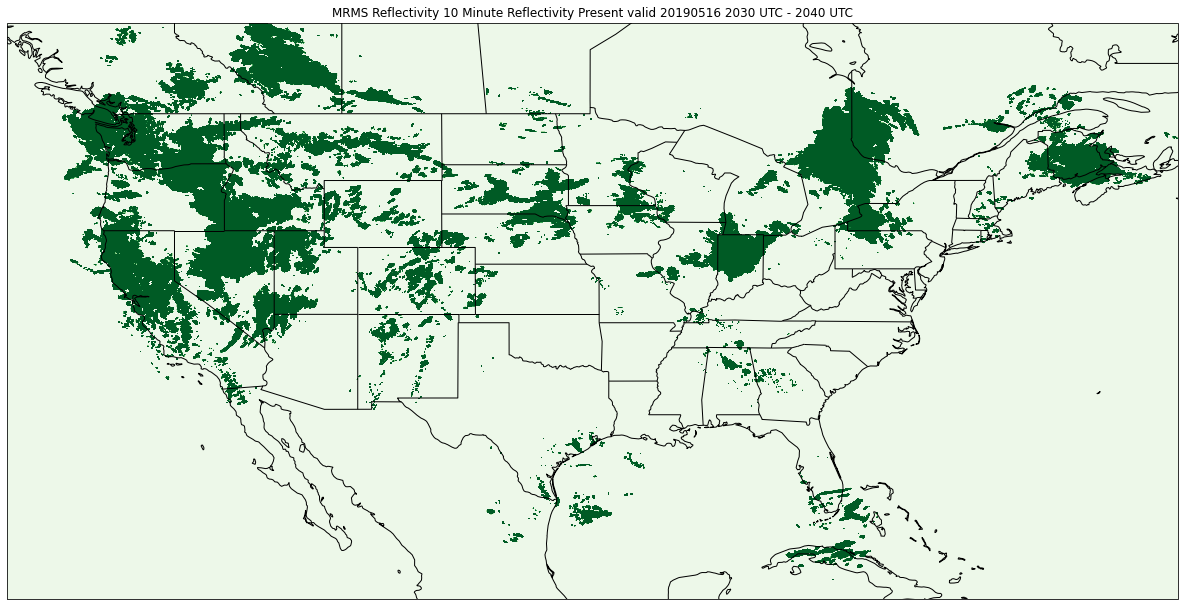

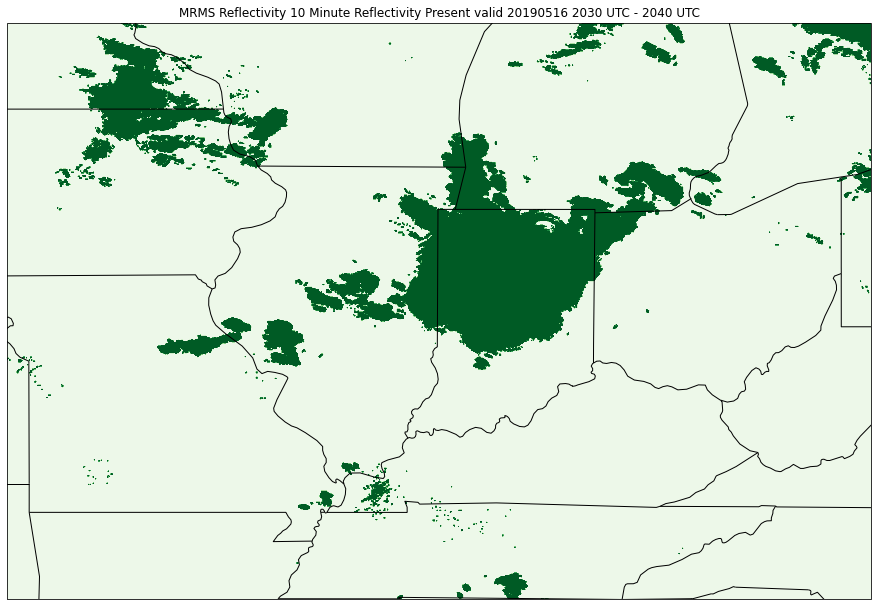

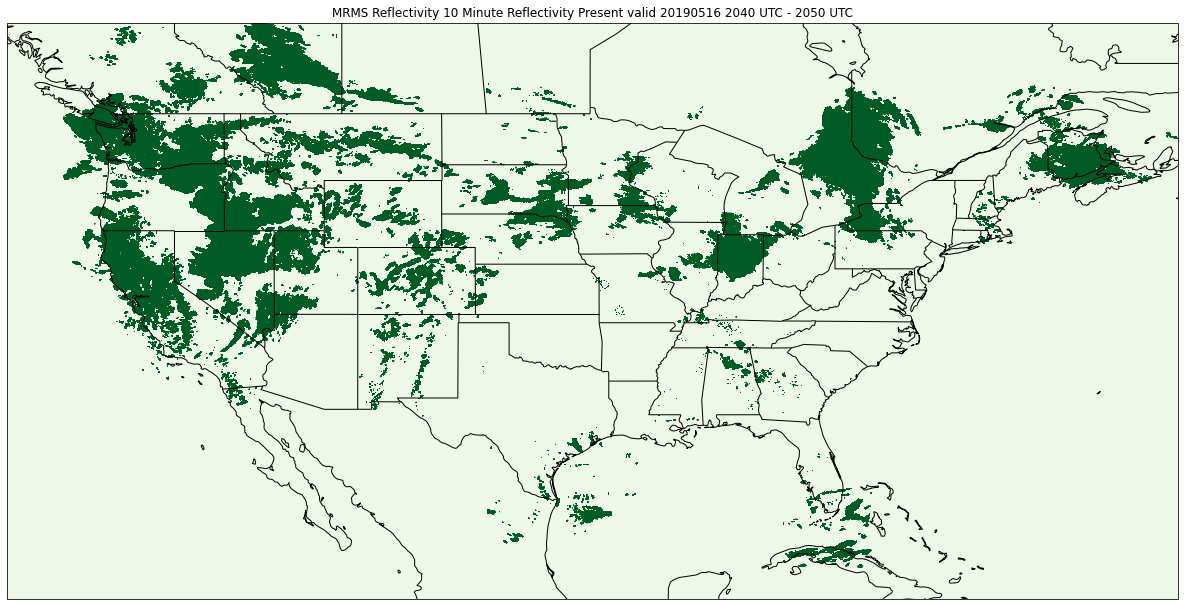

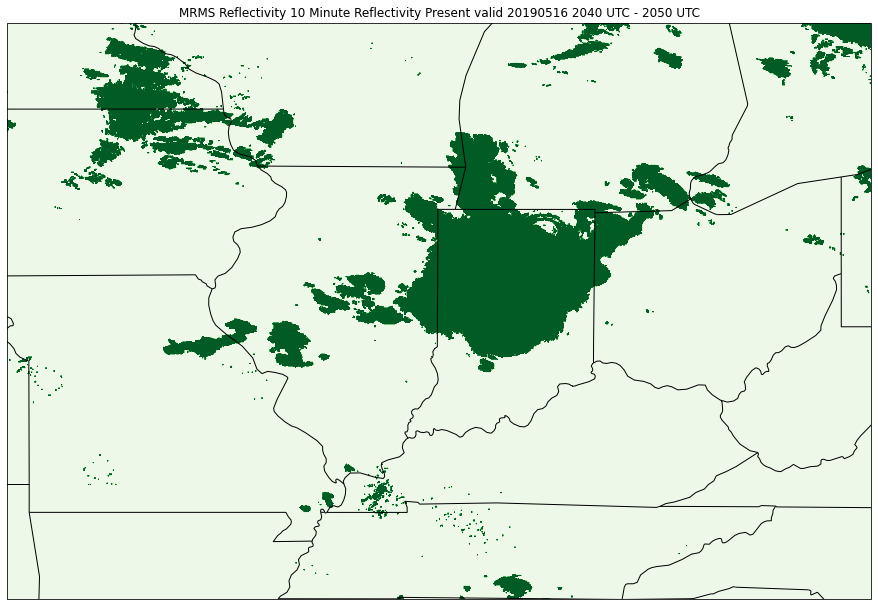

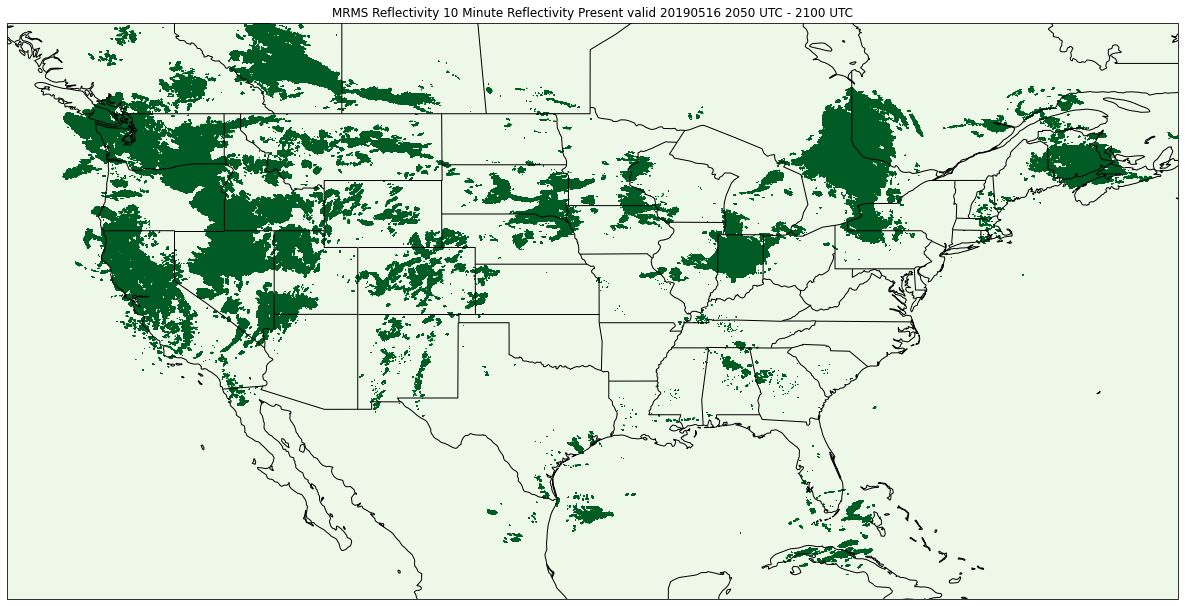

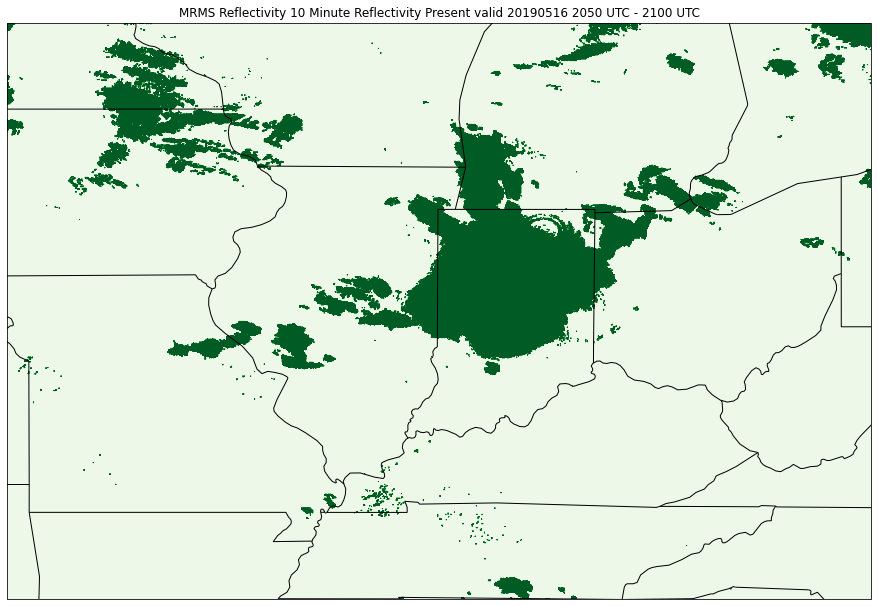

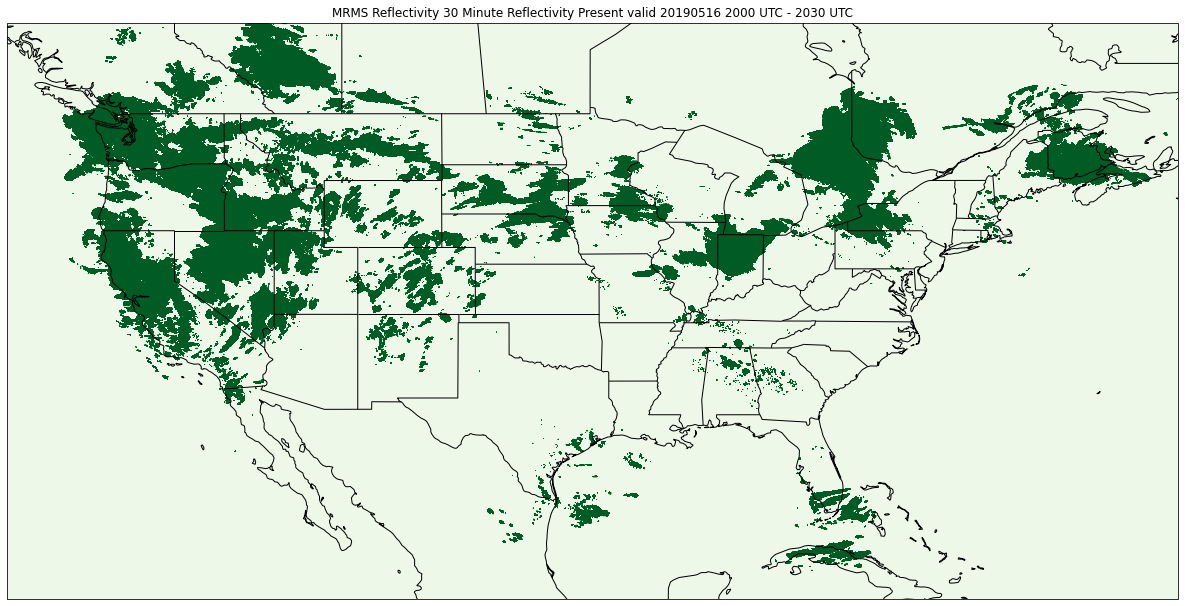

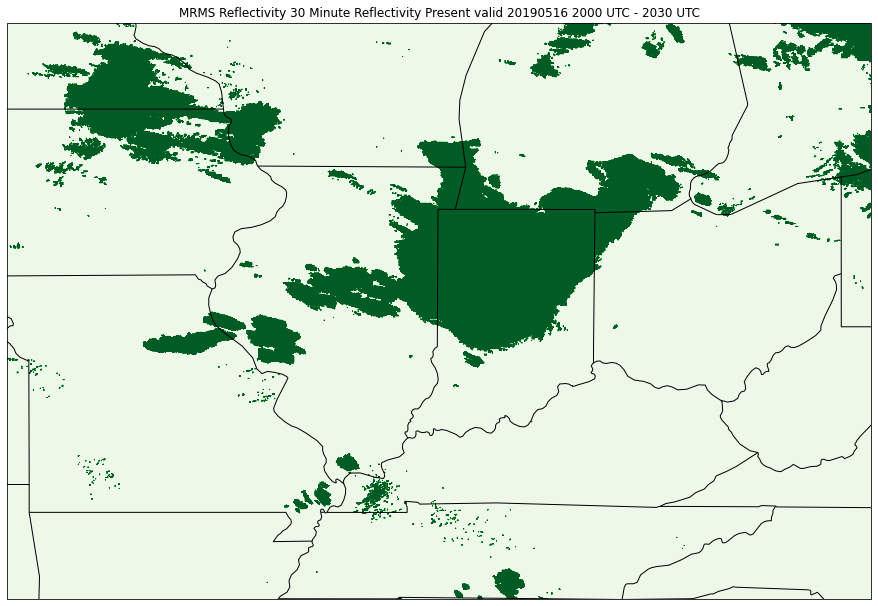

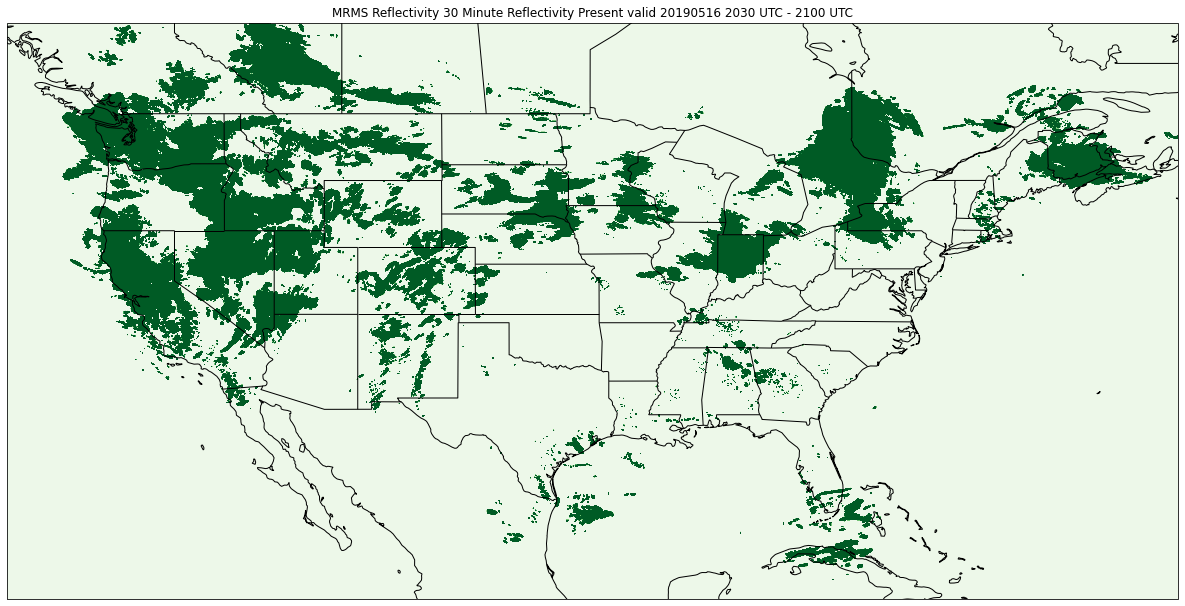

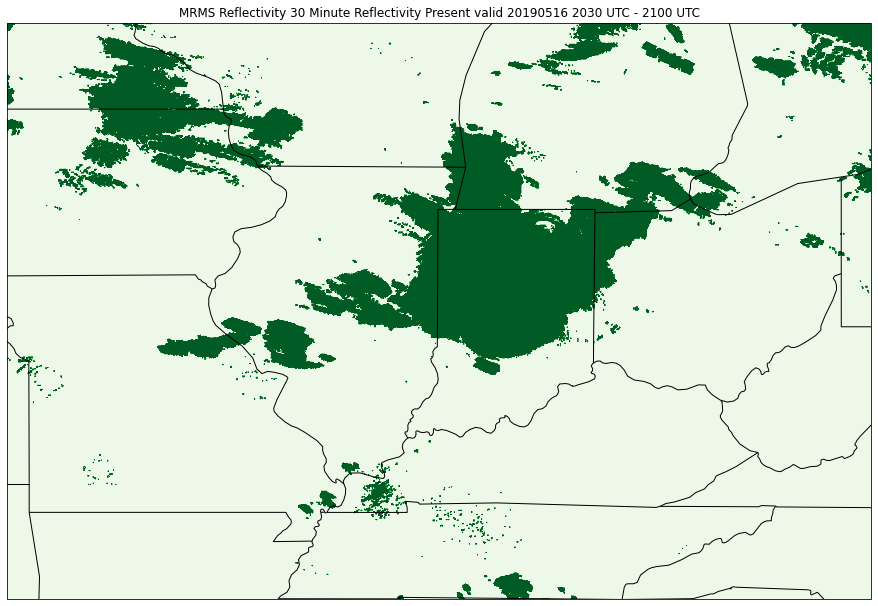

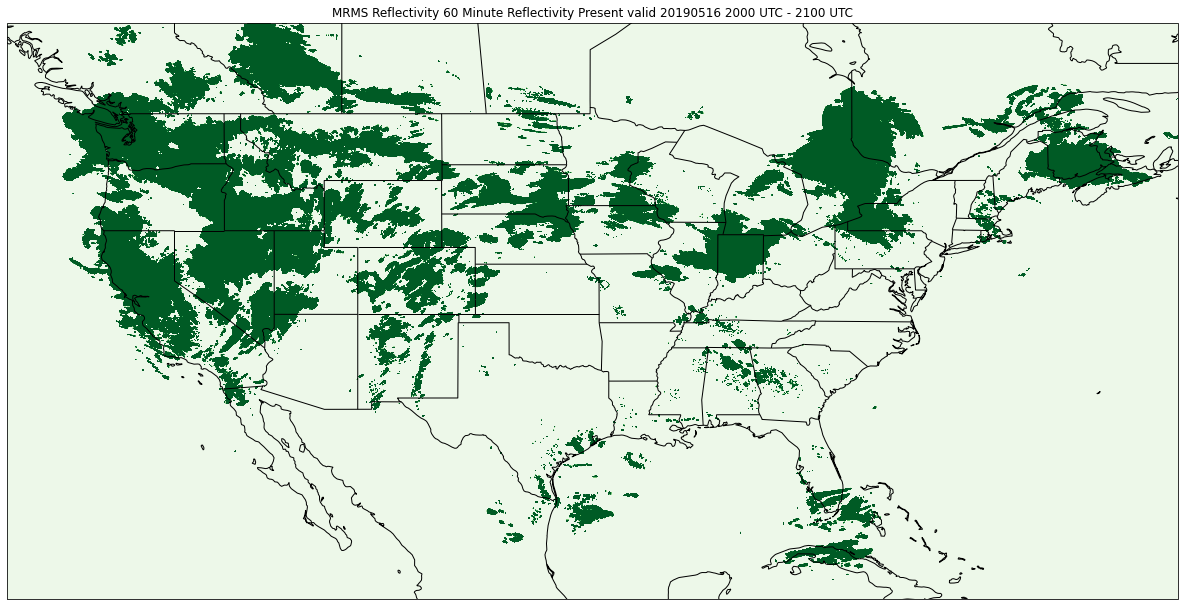

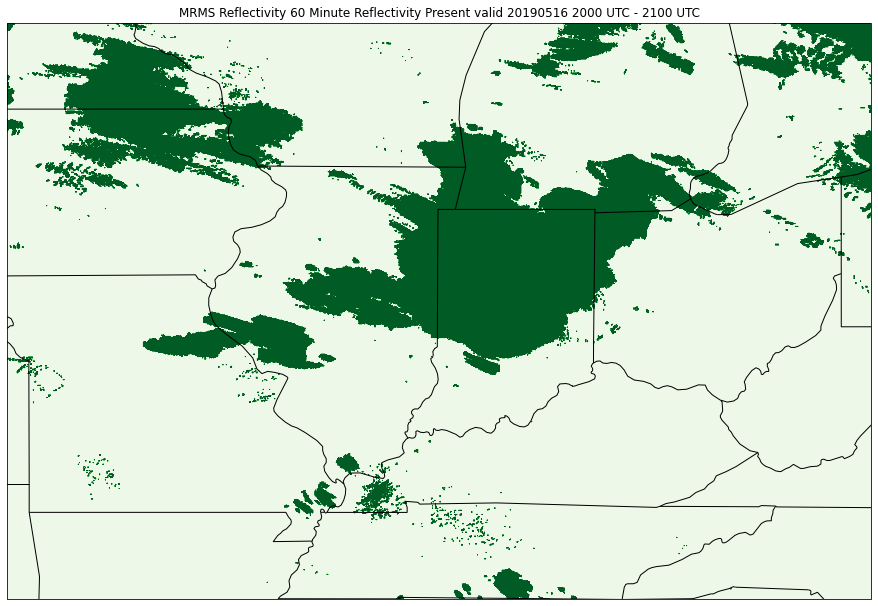

In [11]:
for i in range(len(size_list)):
    mins = minutes_list[i]
    size = size_list[i]
    
    #maximum
    refc_bool = refc.coarsen(valid_time=int(mins/2)).max()>0
    for time in range(size):
        for z in range(len(zoom_types)):
            zoom = zoom_types[z]
            zoom_extent = zoom_extents[z]
            
            fig = plt.figure()
            fig.set_size_inches(20,8)
            ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
            ax.add_feature(cp.feature.BORDERS)
            ax.add_feature(cp.feature.COASTLINE)
            ax.add_feature(states_provinces)
            ax.set_extent(zoom_extent)
            
            plot = ax.contourf(refc_bool.longitude,
                               refc_bool.latitude,
                               refc_bool.isel(valid_time=time).values,
                               cmap="Greens",
                               #vmax=cbar_max,
                               #vmin = 0,
                               transform=ccrs.PlateCarree())
            
            #colbar = plt.colorbar(plot,orientation='vertical')
            #colbar.set_label('Reflectivity [dBZ]',rotation='vertical',fontsize='medium')
            
            titlestr = 'MRMS Reflectivity ' + str(mins) + ' Minute Reflectivity Present valid 20190516 ' + timestring[i][time]
            ax.set_title(titlestr, fontsize='large')
            
            plt.savefig("2019_05_16_figures/Reflectivity_Boolean_" + zoom + '_' + str(mins) + '.' + str(time) + '_Minute.png',bbox_inches='tight')

### Bool=1 Average Reflectivity

In [12]:
refc.values = refc.values.replace(0, np.nan)

for i in range(len(size_list)):
    mins = minutes_list[i]
    size = size_list[i]
    
    refc_nanmean = refc.coarsen(valid_time=int(mins/2)).nanmean()
    for time in range(size):
        for z in range(len(zoom_types)):
            zoom = zoom_types[z]
            zoom_extent = zoom_extents[z]
            
            fig = plt.figure()
            fig.set_size_inches(20,8)
            ax = plt.axes([0.,0.,1,1], projection=ccrs.PlateCarree())
            ax.add_feature(cp.feature.BORDERS)
            ax.add_feature(cp.feature.COASTLINE)
            ax.add_feature(states_provinces)
            ax.set_extent(zoom_extent)
            
            plot = ax.contourf(refc_nanmean.longitude,
                               refc_nanmean.latitude,
                               refc_nanmean.isel(valid_time=time).values,
                               cmap="Spectral_r",
                               vmin=0,
                               vmax=cbar_max,
                               transform=ccrs.PlateCarree())
            
            colbar = plt.colorbar(plot,orientation='vertical')
            colbar.set_label('Reflectivity [dBZ]',rotation='vertical',fontsize='medium')
            
            titlestr = 'MRMS Reflectivity ' + str(mins) + ' Minute Hail Size When Present valid 20190516 ' + timestring[i][time]
            ax.set_title(titlestr, fontsize='large')
            
            plt.savefig("2019_05_16_figures/Reflectivity_NAN_Mean_" + zoom + '_' + str(mins) + '.' + str(time) + '_Minute.png',bbox_inches='tight')

AttributeError: 'numpy.ndarray' object has no attribute 'replace'